In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)
    

In [4]:
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const

plt.rcParams['figure.dpi'] = 150

Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)

Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows=3)
    
    # Find segments where V2 is increasing
    increasing_segments = []
    start_idx = None
    for idx in range(1, len(Data)):
        if Data[idx, 2] > Data[idx - 1, 2]:  # Check if V2 is increasing
            if start_idx is None:
                start_idx = idx - 1
        elif start_idx is not None:
            increasing_segments.append(Data[start_idx:idx])
            start_idx = None
    
    # Append increasing segments to Data_list
    Data_list.extend(increasing_segments)

# Now Data_list contains all segments where V2 is increasing


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


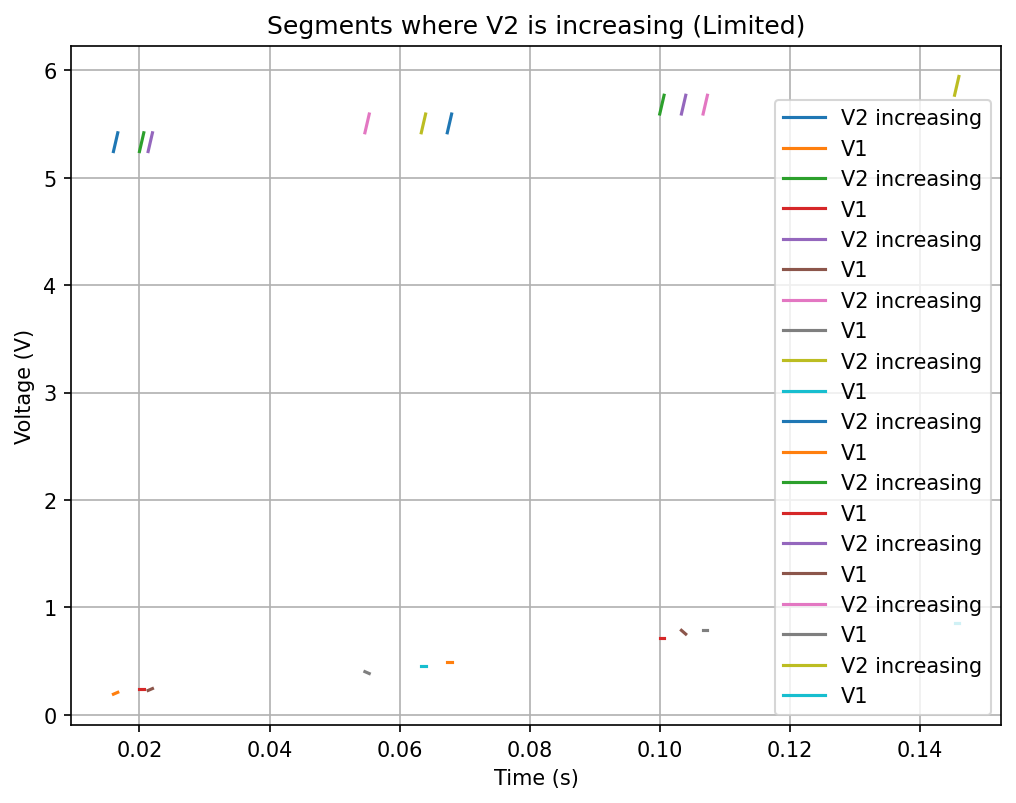

In [4]:
# Plotting a limited number of segments where V2 is increasing
plt.figure(figsize=(8, 6))
num_segments_to_plot = min(10, len(Data_list))  # Change 10 to the desired number of segments to plot
for segment in Data_list[:num_segments_to_plot]:
    time = segment[:, 0]
    V1 = segment[:, 1]
    V2 = segment[:, 2]
    plt.plot(time, V2, label='V2 increasing')
    plt.plot(time, V1, label='V1')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Segments where V2 is increasing (Limited)')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
len(Data_list)

20005

TypeError: The number of func parameters=3 must not exceed the number of data points=2

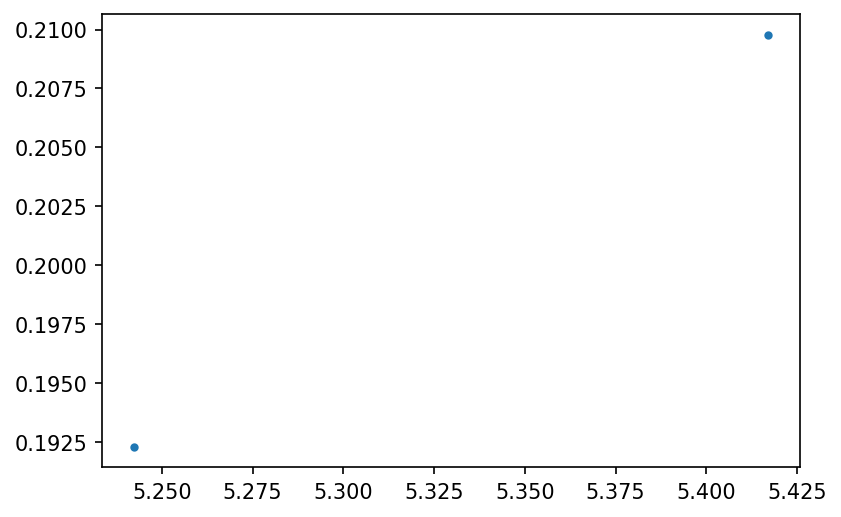

In [14]:
c_light = const.c
eps0 = const.epsilon_0
a = (1/4)*c_light*eps0
b = (2*np.pi)/(600e-9) 

a_guess = a*2
k_guess = 2
c_guess = 1

p0_1= [a_guess, k_guess, c_guess]

def Intensity_fit(v,*p): #define fitting function
    a=p[0]
    k = p[1]
    c = p[2]
    return a * (1+np.cos(b*2*k*v))+c

# Plot the data between the first min and max points for each dataset
for data in Data_list:
    plt.figure()
    V1 = data[:, 1]  # Assuming V1 is the second column
    V2 = data[:, 2]  # Assuming V2 is the third column
    plt.plot(V2, V1,'.',label='V1')
    #plt.plot(time, V2, label='V2')

    popt, pcov = sp.curve_fit(Intensity_fit, V2, V1, p0=p0_1)
    plt.plot(V2, Intensity_fit(V2, *popt),'o',label='fit for both')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Data between the first min and max points for each dataset')
#plt.legend()
    plt.show()

len(V1)

array([5.242372, 5.417077])

In [5]:
c_light = const.c
eps0 = const.epsilon_0
T = 0.5
R = 0.5
I_av = [np.mean(i) for i in Data_list]
# Guess values for function
a_guess = (1/4)*c_light*eps0*9.9**2
b_guess = (2*np.pi) #/(600e-7)


In [6]:
Time=Data[:,0]

In [45]:
a = (1/4)*c_light*eps0
b = (2*np.pi)/(600e-9) 

a_guess = a*2
k_guess = 2
c_guess = 0

p0_1= [a_guess,k_guess, c_guess]

def Intensity_fit(v,*p): #define fitting function
    a=p[0]
    k = p[1]
    c = p[2]
    return a * (1+np.cos(b*2*k*v))+c

mean_data = []
v1_data = []
v2_data =[]
for i in Data_list:
    v1_data.append(i[1])
    v2_data.append(i[2])

len(v1_data)

v1_mean = np.mean(v1_data[1])
v2_mean = np.mean(v2_data[2])




In [42]:
len(v1_data)

30

/tmp/ipykernel_999/1995741177.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure() #plot raw data


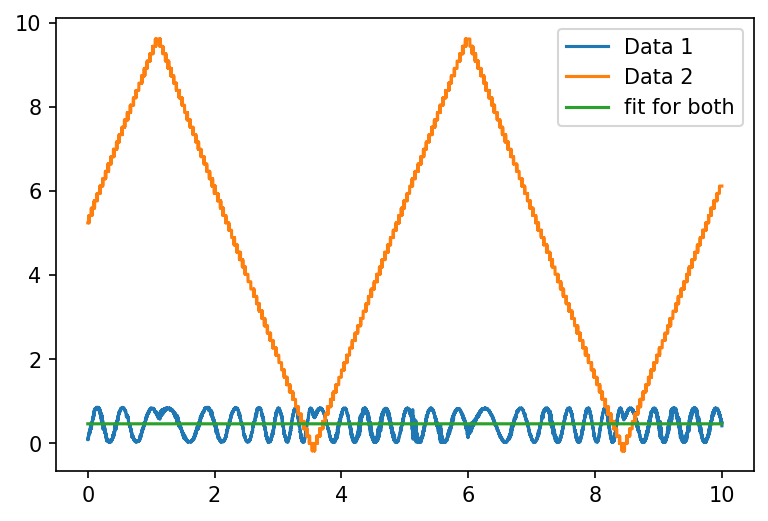

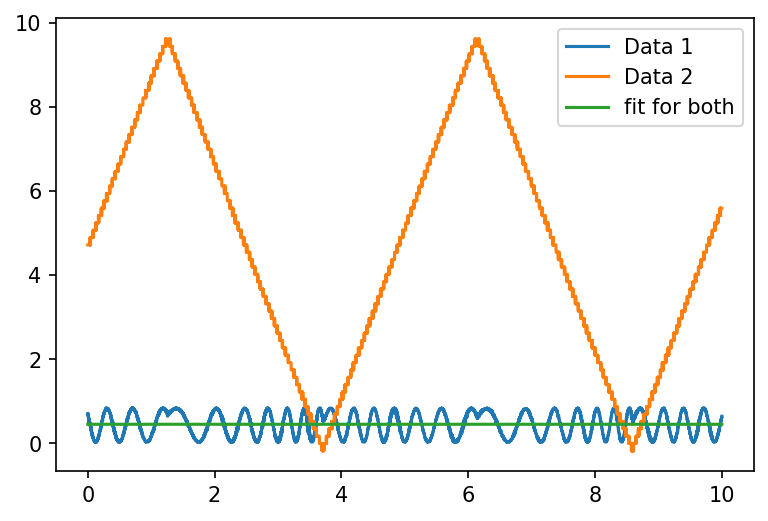

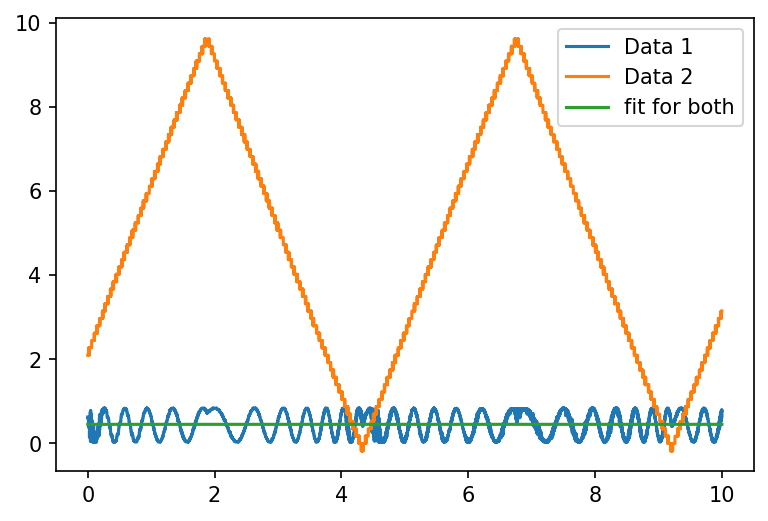

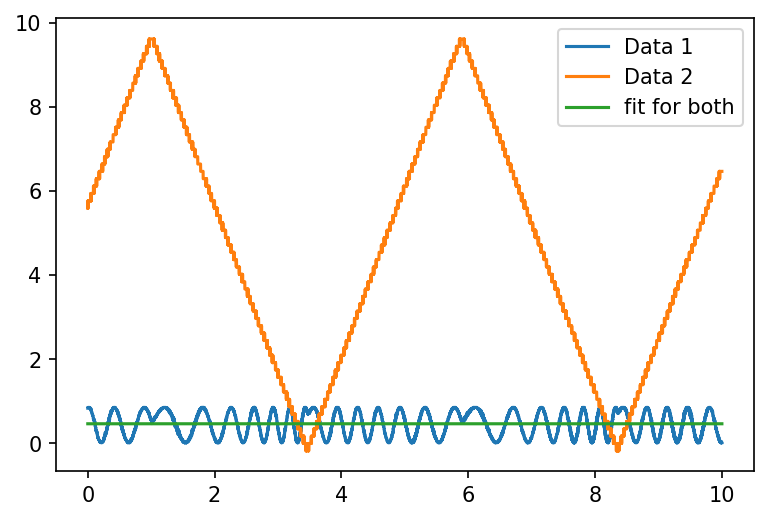

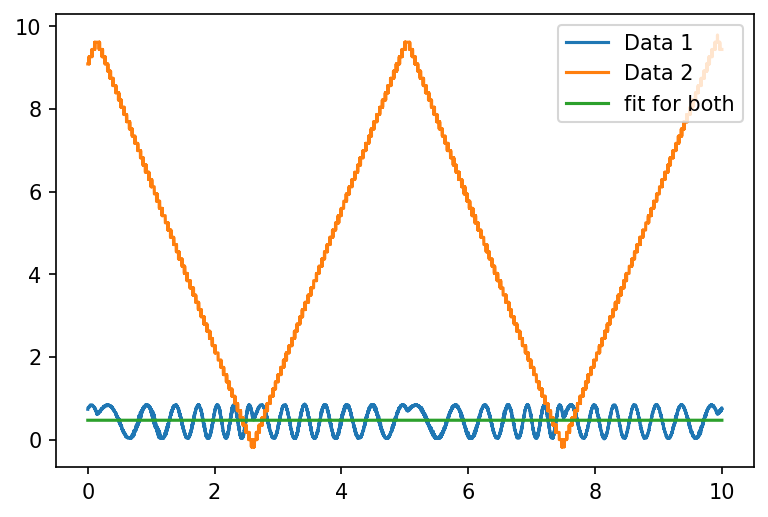

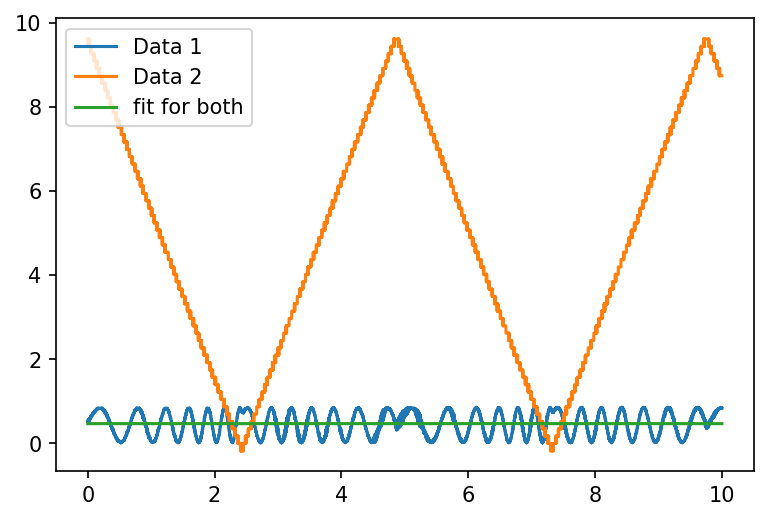

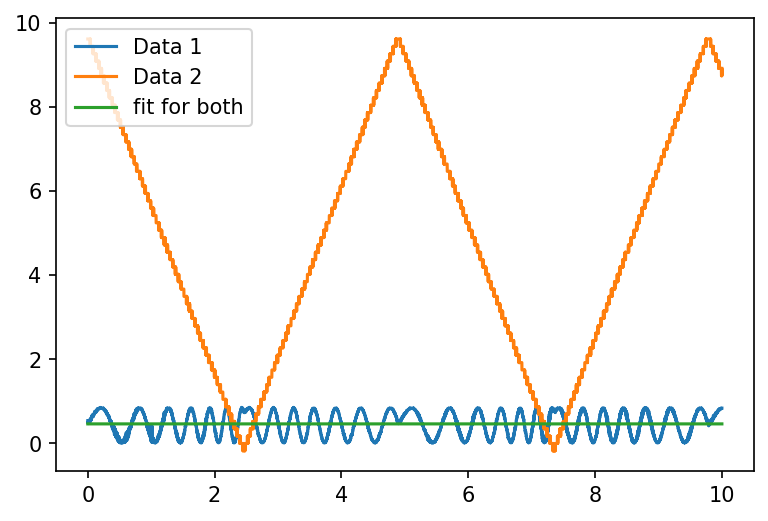

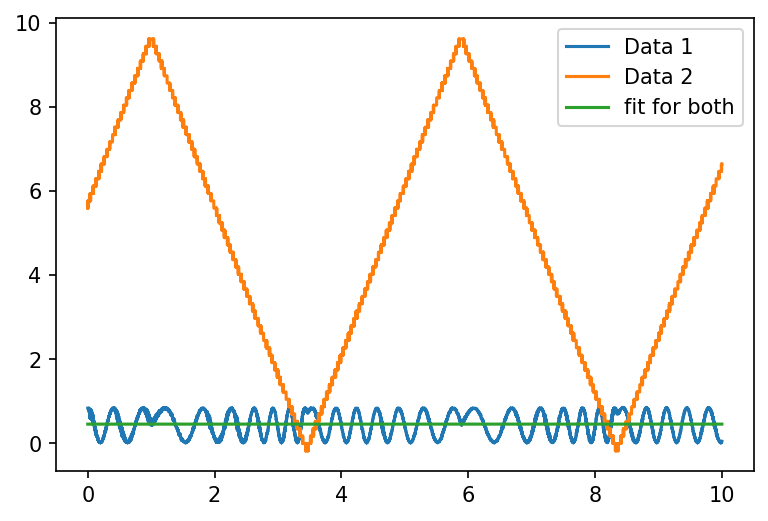

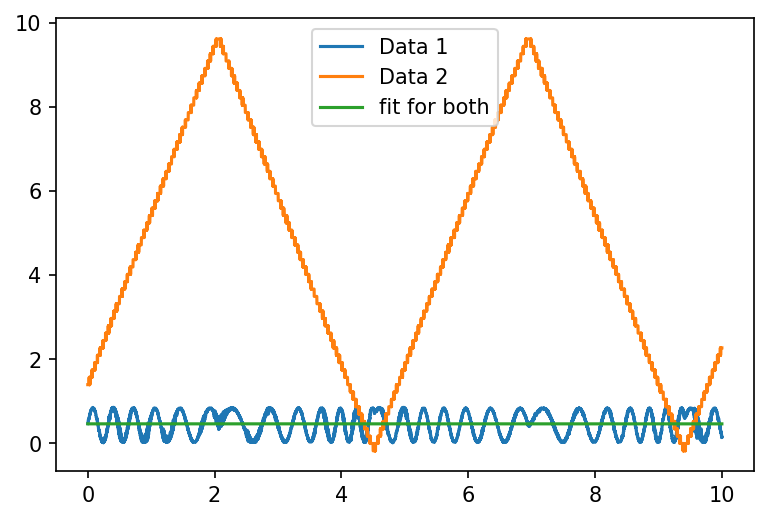

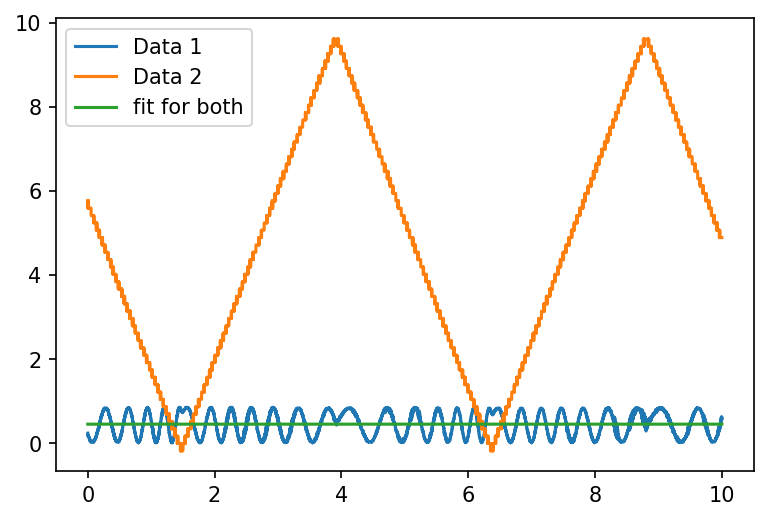

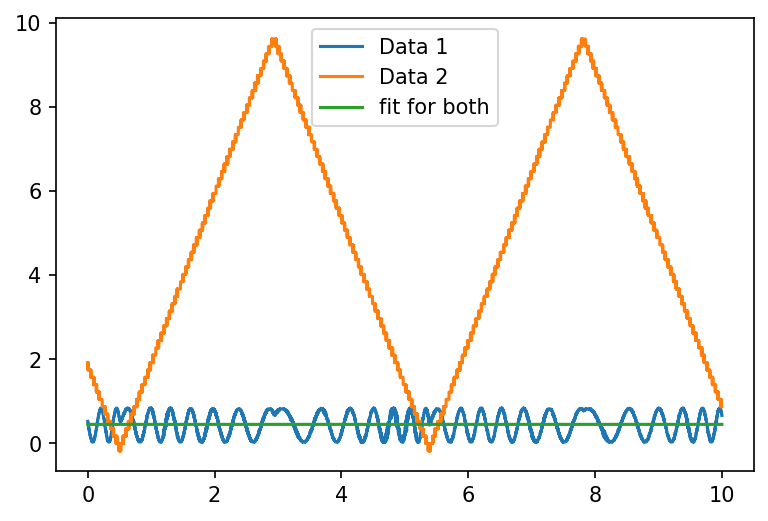

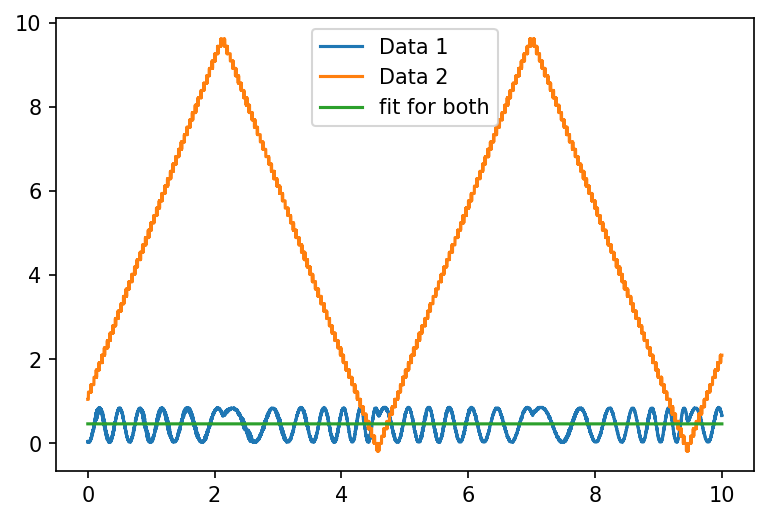

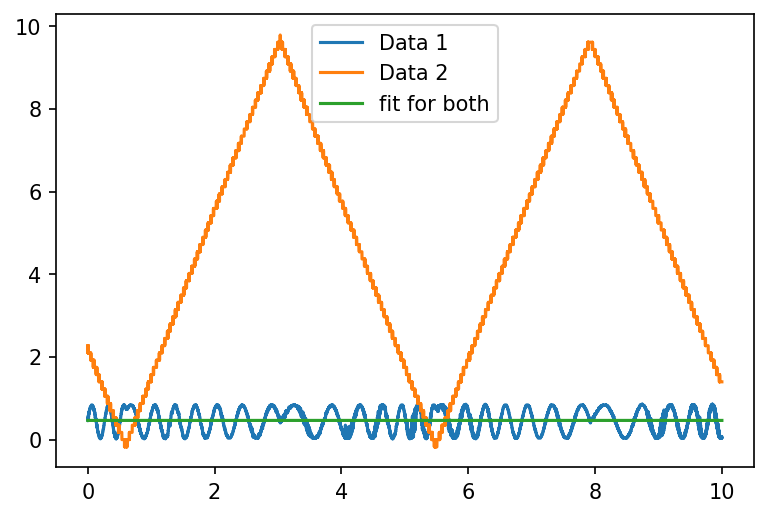

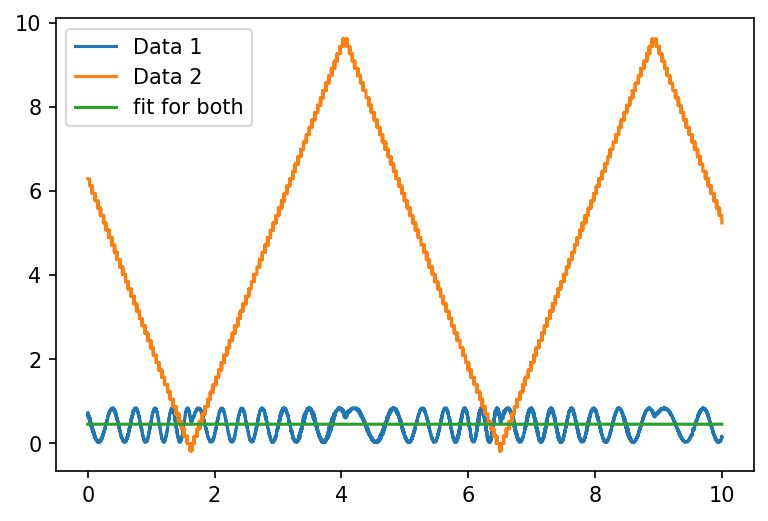

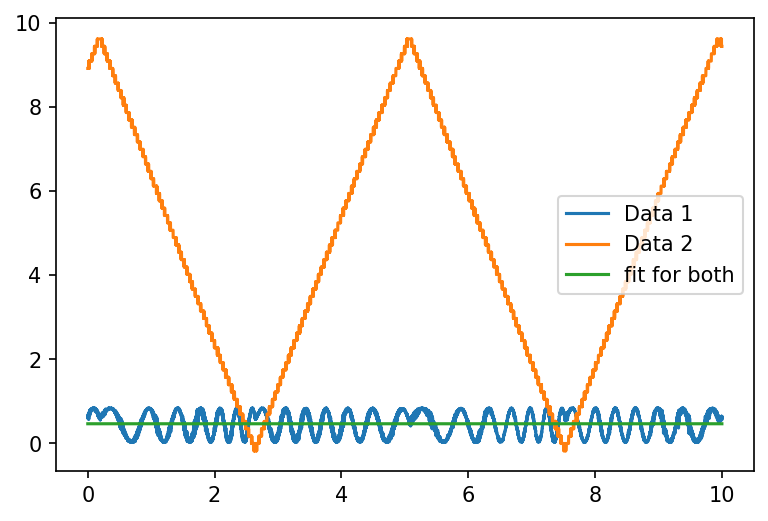

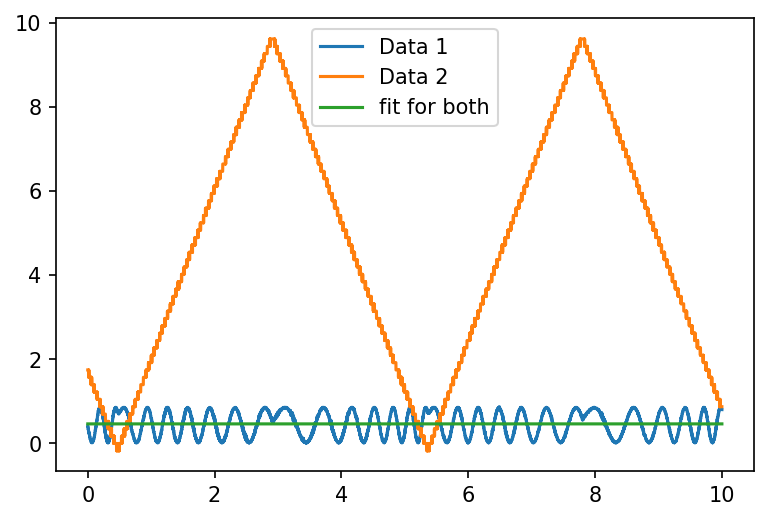

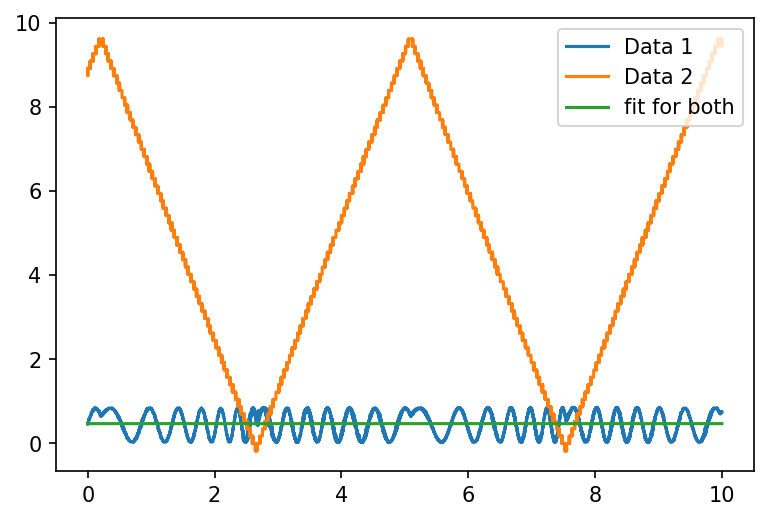

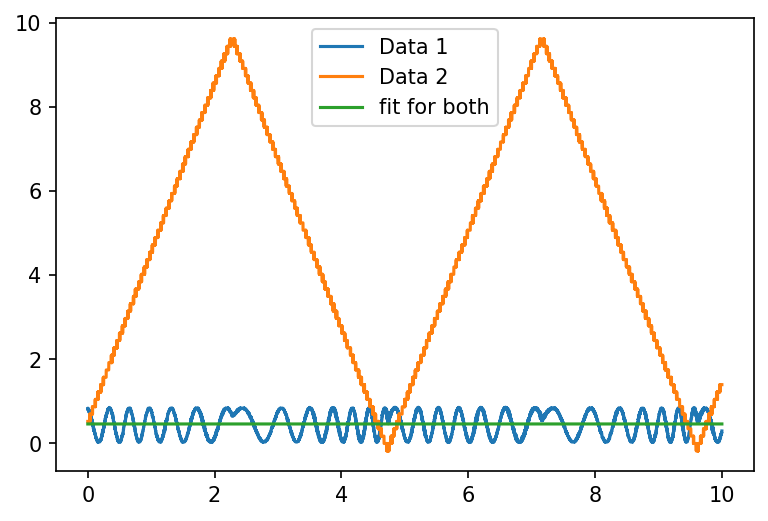

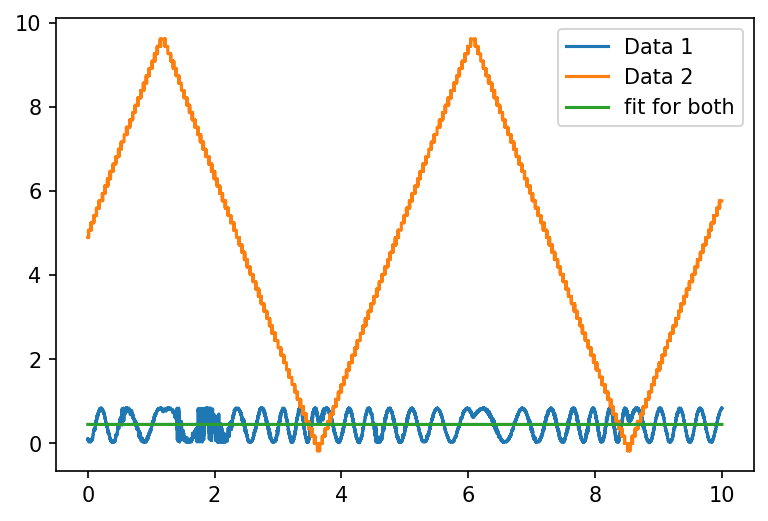

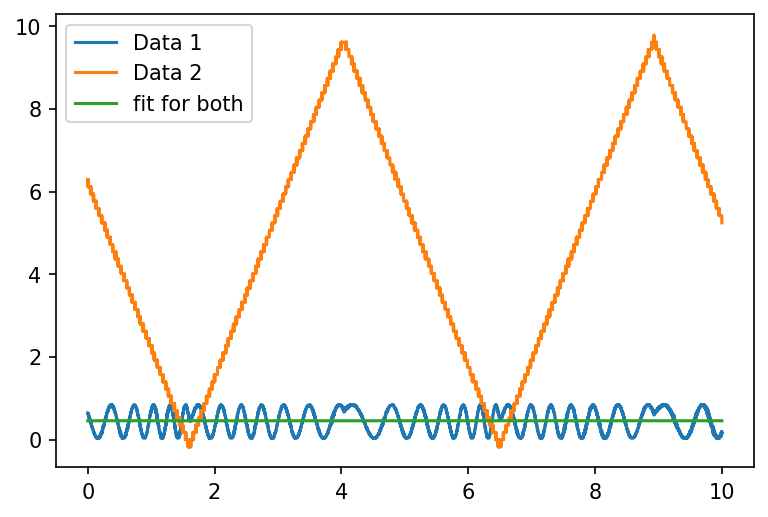

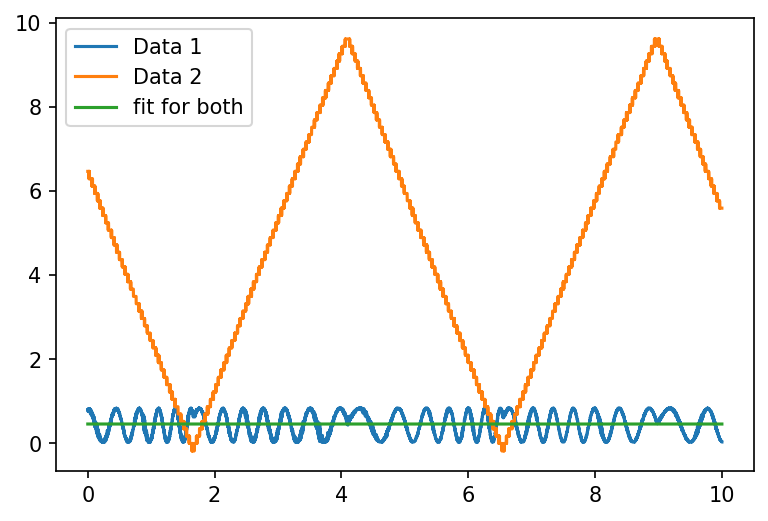

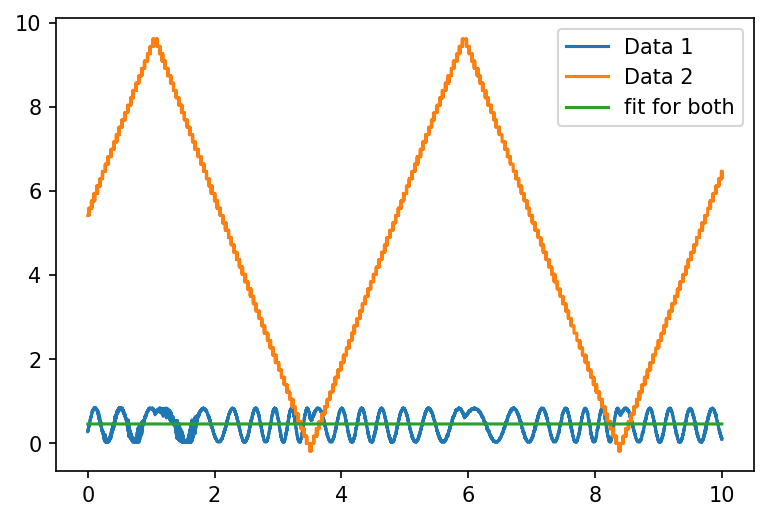

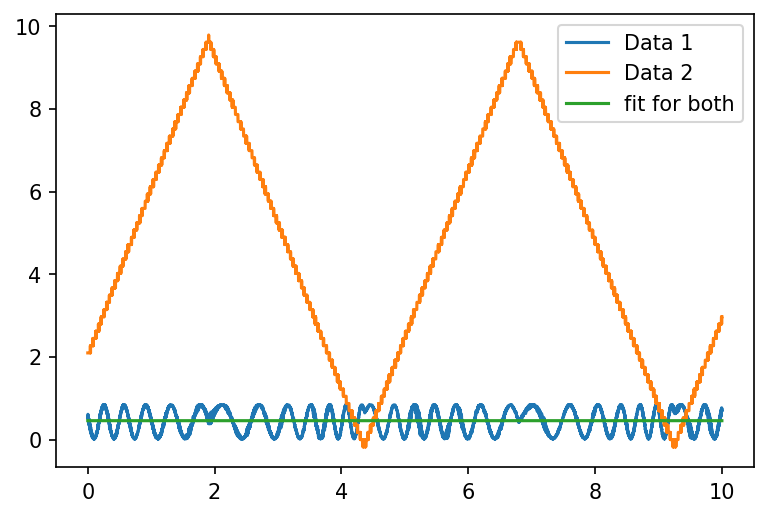

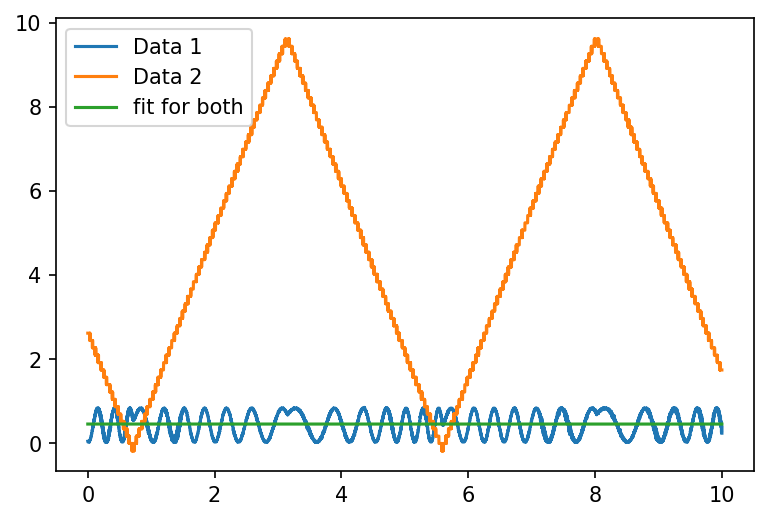

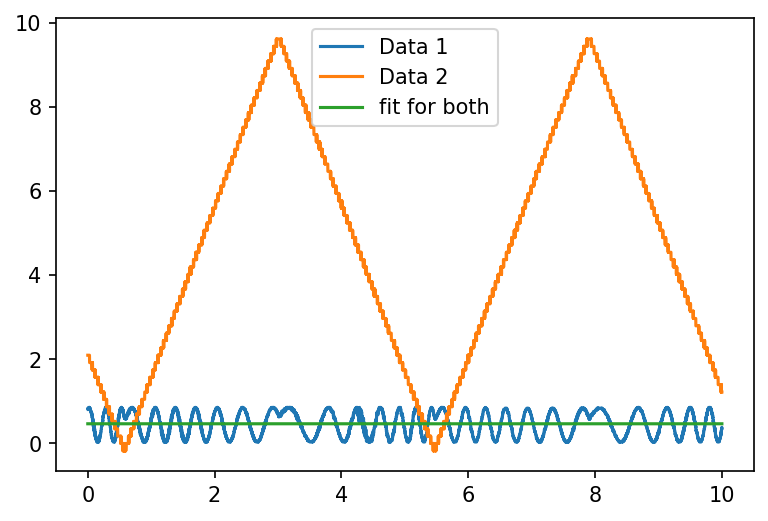

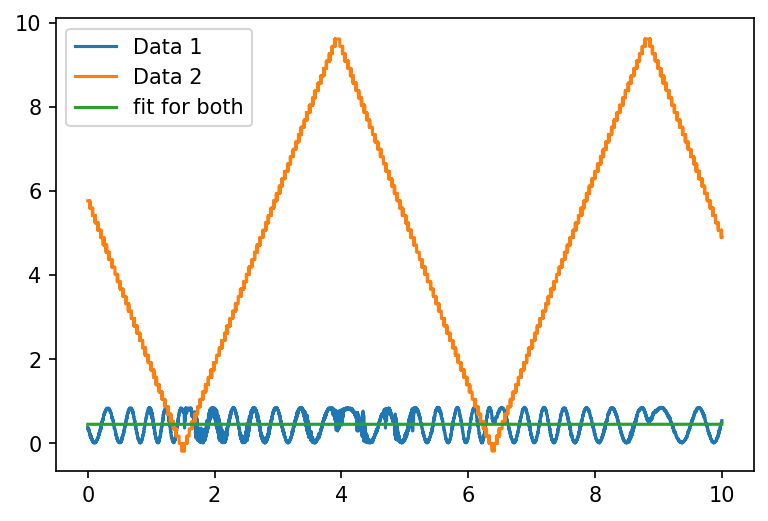

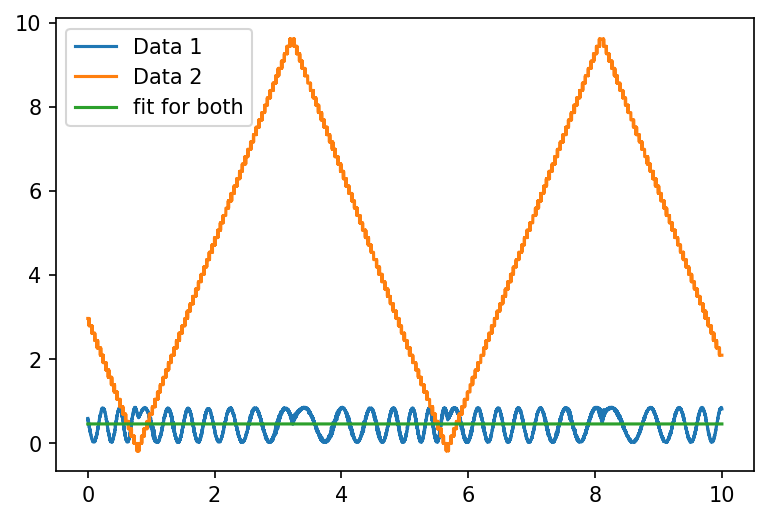

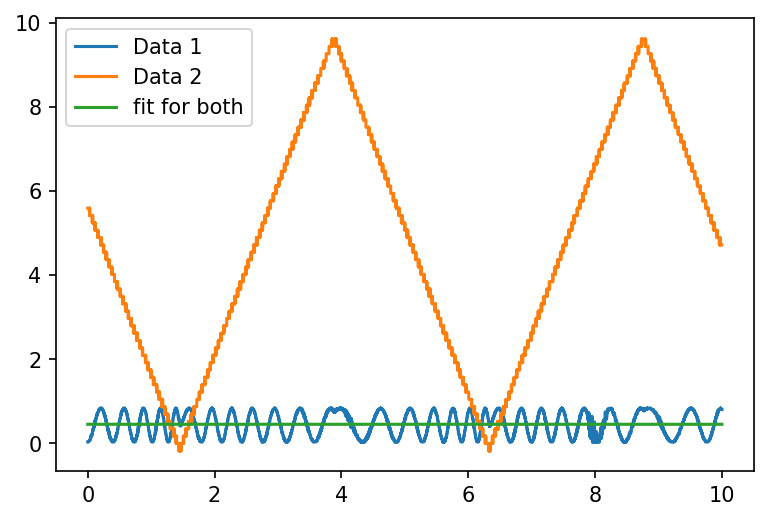

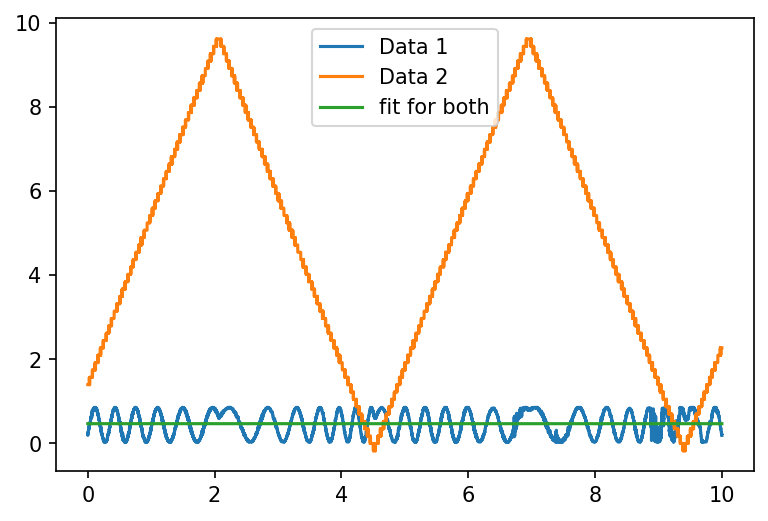

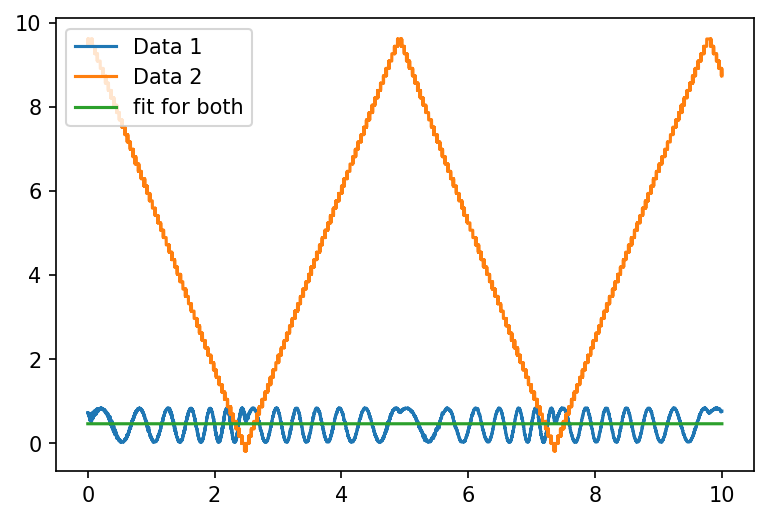

In [44]:
for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V1=Data[:,1]
    V2=Data[:,2]
    plt.plot(Time, V1, '-', label='Data 1')
    plt.plot(Time,V2, label='Data 2')
    #plt.xlabel('Time [s]')
    #plt.ylabel('Voltage [V]')
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(Intensity_fit, Time, V1, p0 = [a_guess, k_guess, c_guess]) #add them together (v1+v2) to see how the combined wave
    plt.plot(Time, Intensity_fit(V2 ,*popt1),'-',label='fit for both')
    
    plt.legend()

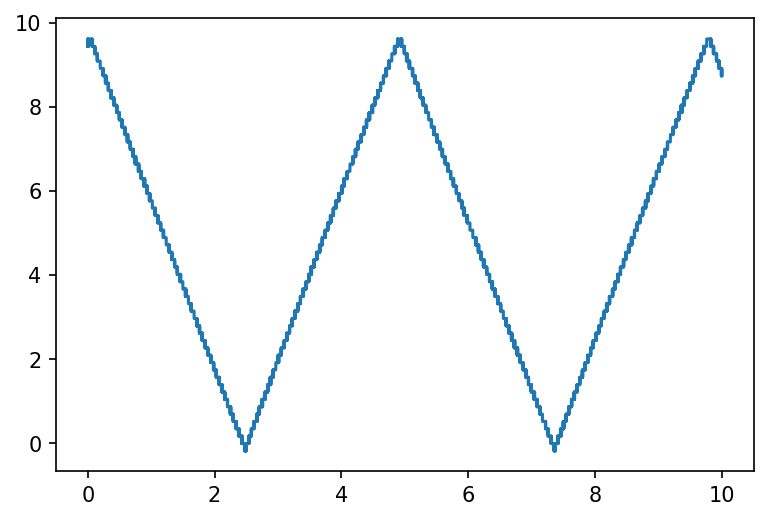

In [58]:
Time = Data[:,0]
V2 = Data[:,2]

plt.plot(Time, V2)


In [79]:
import numpy as np

# Assuming filtered_data contains your filtered datasets where V2 is increasing
time_between_min_max = []

for data in Data_list:
    V2_values = data[:, 2]  # Assuming V2 is the third column
    
    # Find the index of the first occurrence of the minimum and maximum points
    min_index = np.argmin(V2_values)
    max_index = np.argmax(V2_values)
    
    # Get the corresponding time values
    time = data[:, 0]
    
    # Calculate the length of time between the bottom and the top
    time_diff = time[max_index] - time[min_index]
    
    time_between_min_max.append(time_diff)

print("Length of time between the bottom and the top for each dataset:", time_between_min_max)


Length of time between the bottom and the top for each dataset: [-2.47401963, -2.47068627, -2.47068627, -2.4726862900000004, 7.352058339999999, -2.41201914, -2.44601941, -2.47735299, -2.4773529899999995, 2.41068579, 2.41001912, -2.4666862400000005, 2.45601949, 2.4100191300000002, -2.47135294, 2.41668584, -2.4706862800000002, -2.4700195899999997, -2.4786863400000003, 7.35139166, 2.41735251, -2.47201962, -2.43401931, 2.41668584, 2.42335256, 2.41468583, 2.41201913, 2.41535249, -2.4773529899999995, -2.47068627]


In [80]:
import numpy as np

# List to store the data between the first min and max points for each dataset
data_between_min_max = []

for data in Data_list:
    # Assuming V2 is the third column
    V2_values = data[:, 2]
    
    # Find the index of the first occurrence of the minimum and maximum points
    min_index = np.argmin(V2_values)
    max_index = np.argmax(V2_values)
    
    # Determine the start and end indices for the data between the first min and max points
    start_index = min(min_index, max_index)
    end_index = max(min_index, max_index)
    
    # Extract the data between the first min and max points
    data_between_min_max.append(data[start_index:end_index + 1])

print("Data between the first min and max points for each dataset:", data_between_min_max)


Data between the first min and max points for each dataset: [array([[ 1.06600846,  0.7517225 ,  9.61122   ],
       [ 1.06667513,  0.7517225 ,  9.436516  ],
       [ 1.0673418 ,  0.734252  ,  9.436516  ],
       ...,
       [ 3.53869474,  0.7866634 ,  0.        ],
       [ 3.53936142,  0.7866634 ,  0.        ],
       [ 3.54002809,  0.7866634 , -0.1747047 ]]), array([[ 1.22534306,  0.7866634 ,  9.61122   ],
       [ 1.22600973,  0.7866634 ,  9.436516  ],
       [ 1.2266764 ,  0.7866634 ,  9.61122   ],
       ...,
       [ 3.69469598,  0.6643085 ,  0.        ],
       [ 3.69536265,  0.6468381 ,  0.        ],
       [ 3.69602933,  0.6468381 , -0.1747047 ]]), array([[ 1.84334796,  0.8216658 ,  9.61122   ],
       [ 1.84401463,  0.8216658 ,  9.436516  ],
       [ 1.8446813 ,  0.8216658 ,  9.436516  ],
       ...,
       [ 4.31270089,  0.7167815 ,  0.        ],
       [ 4.31336756,  0.7517225 ,  0.        ],
       [ 4.31403423,  0.7691929 , -0.1747047 ]]), array([[ 0.96734101,  0.681779  ,

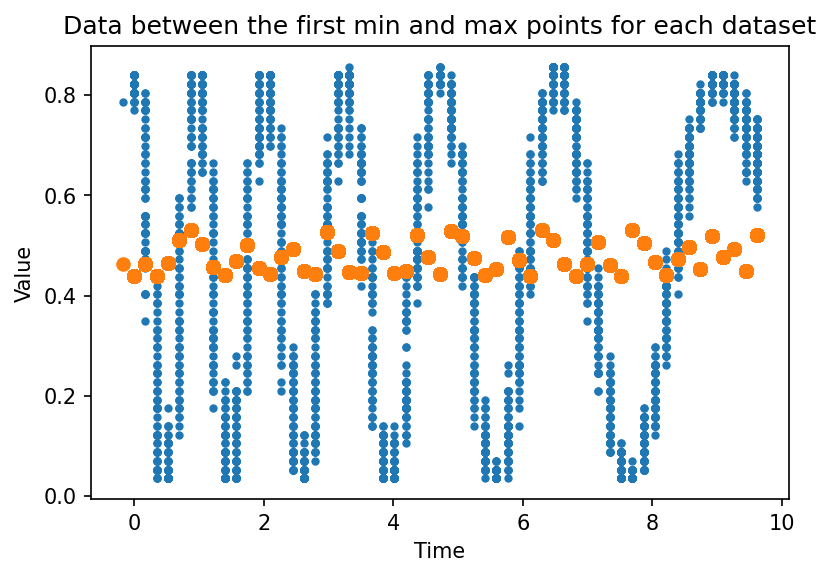

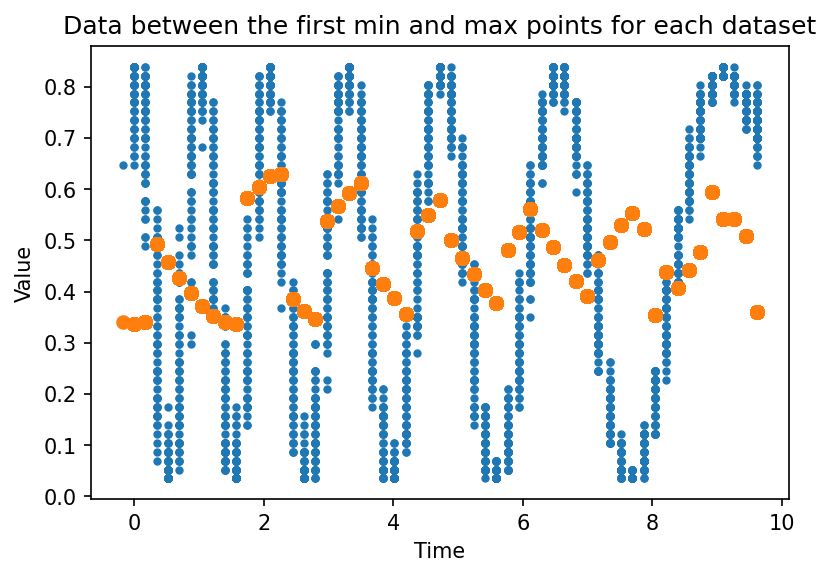

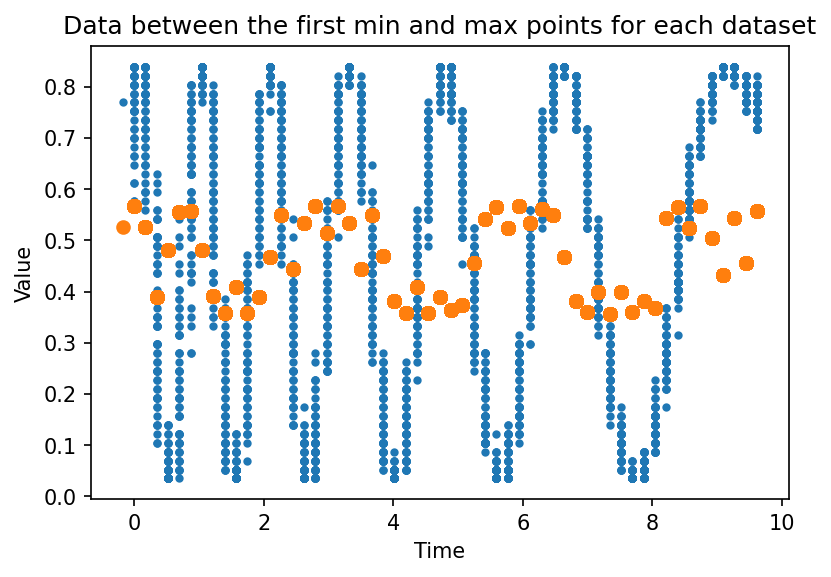

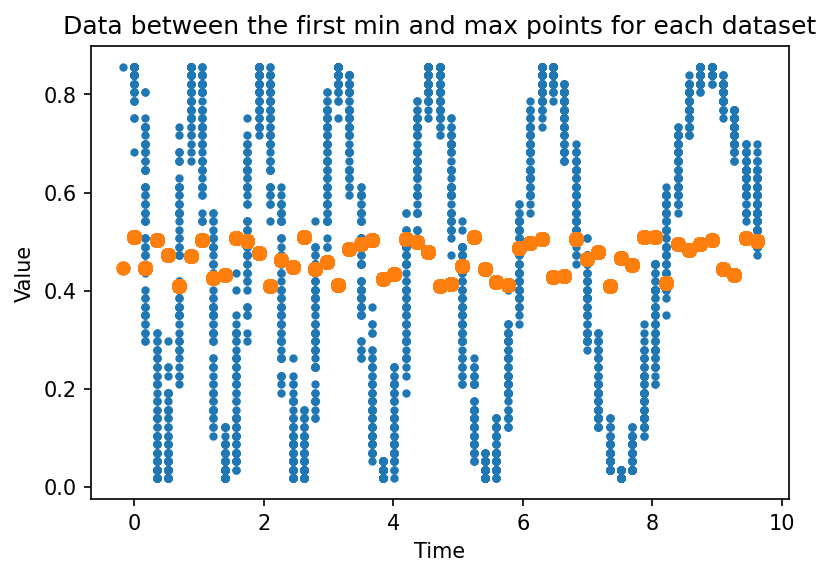

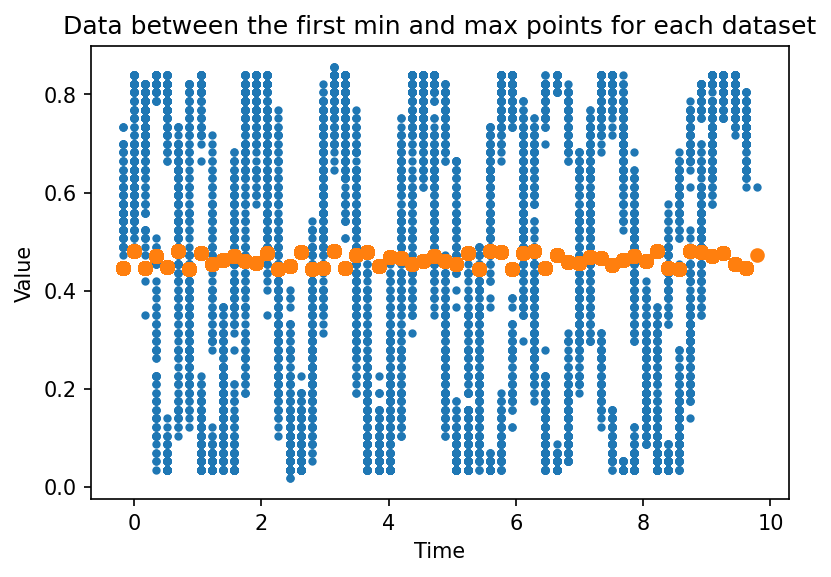

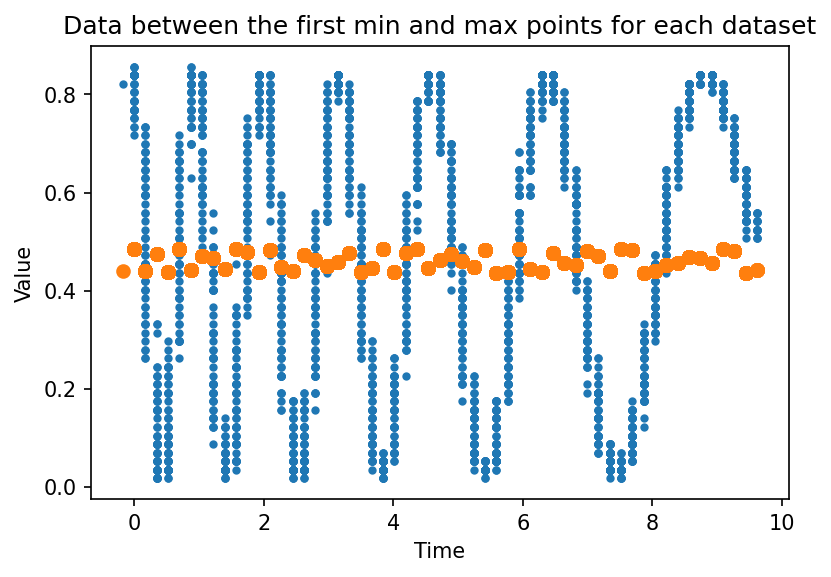

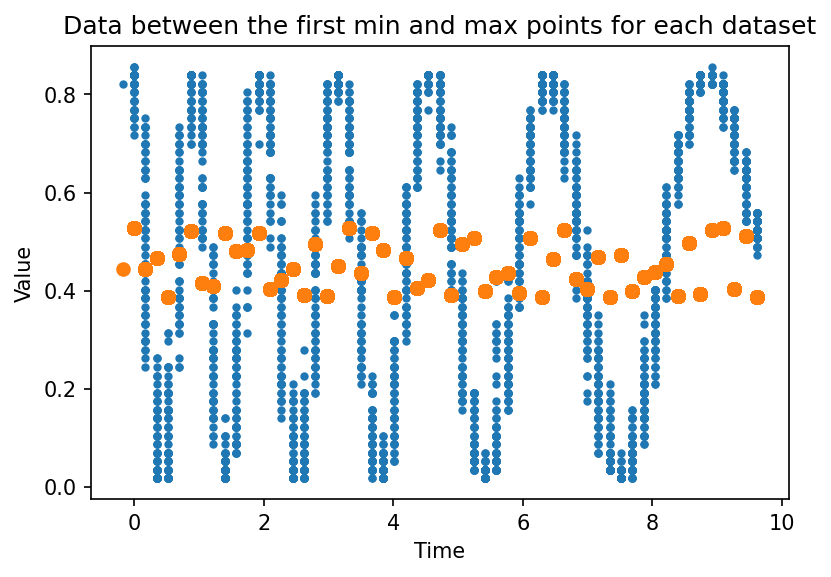

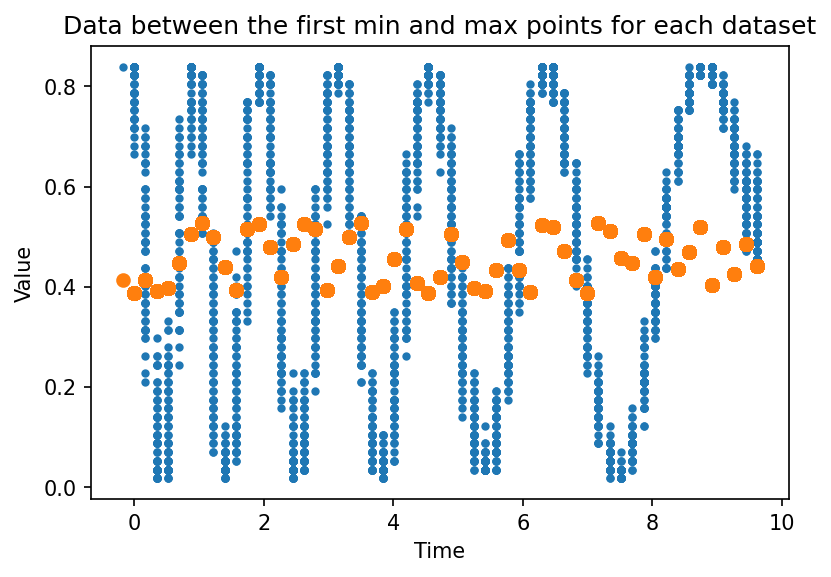

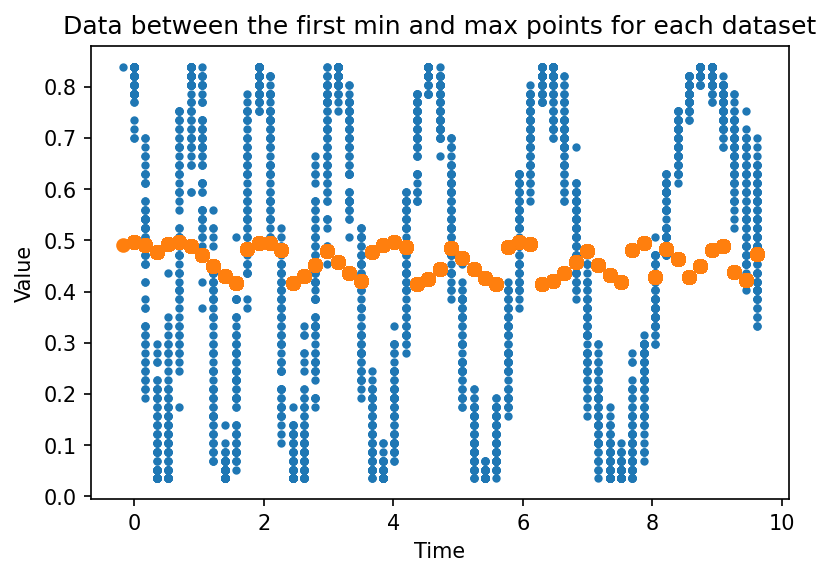

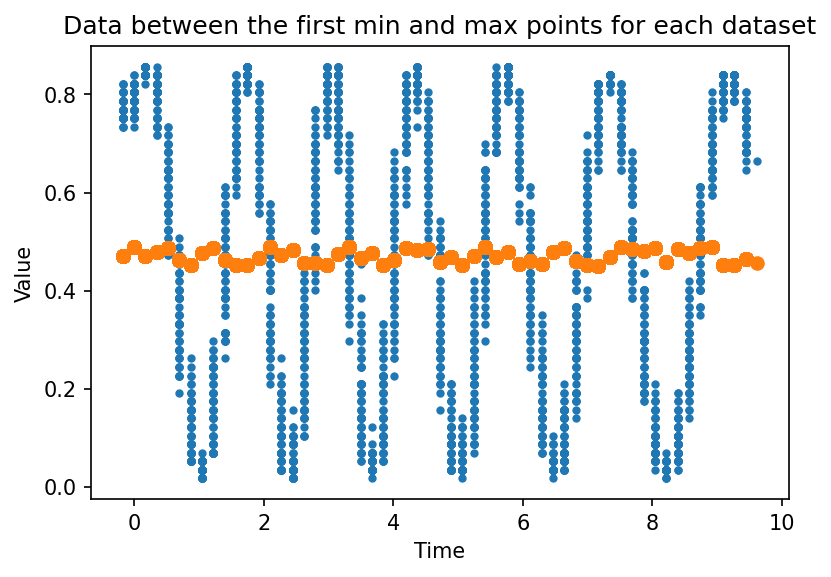

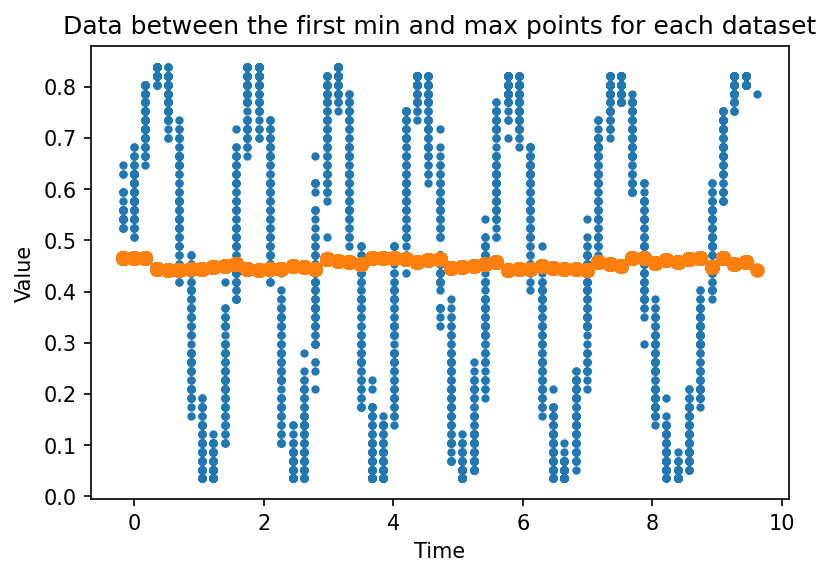

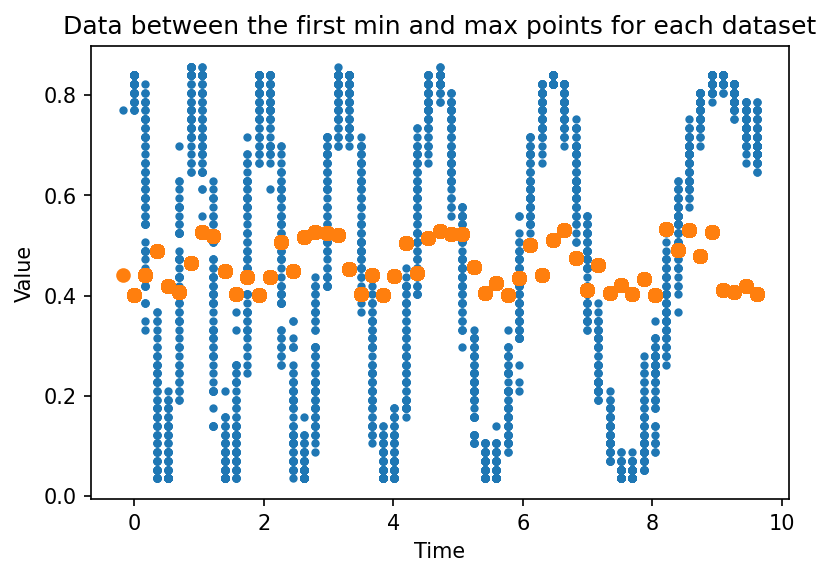

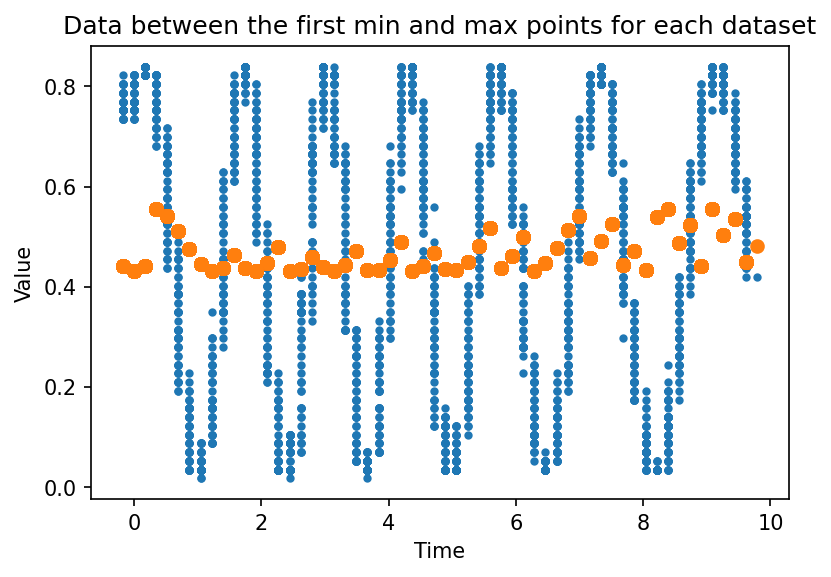

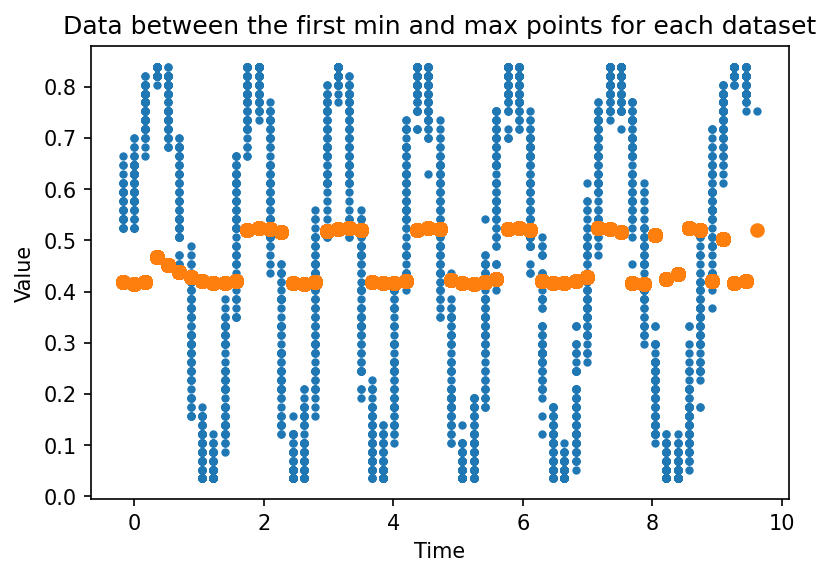

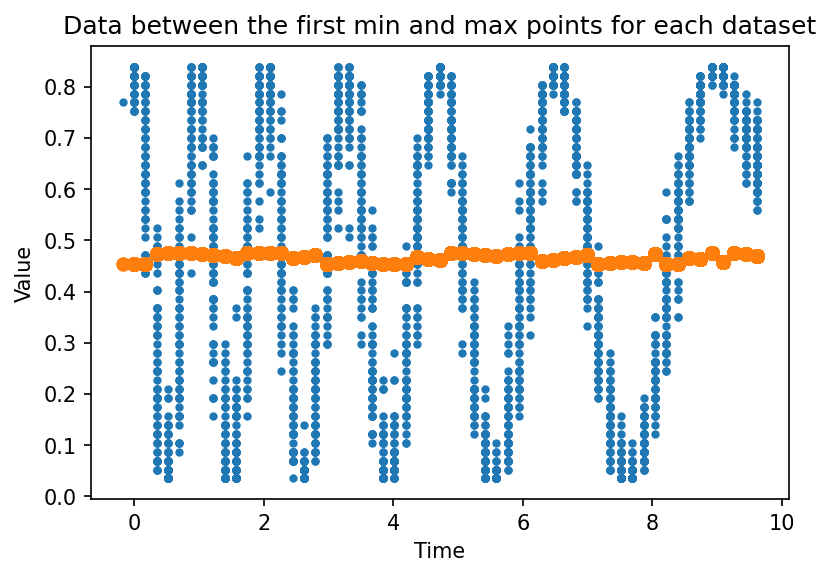

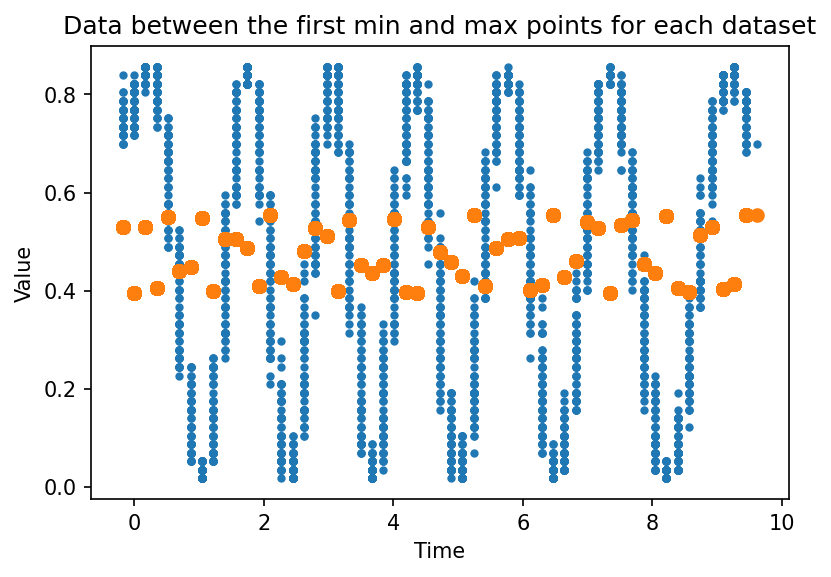

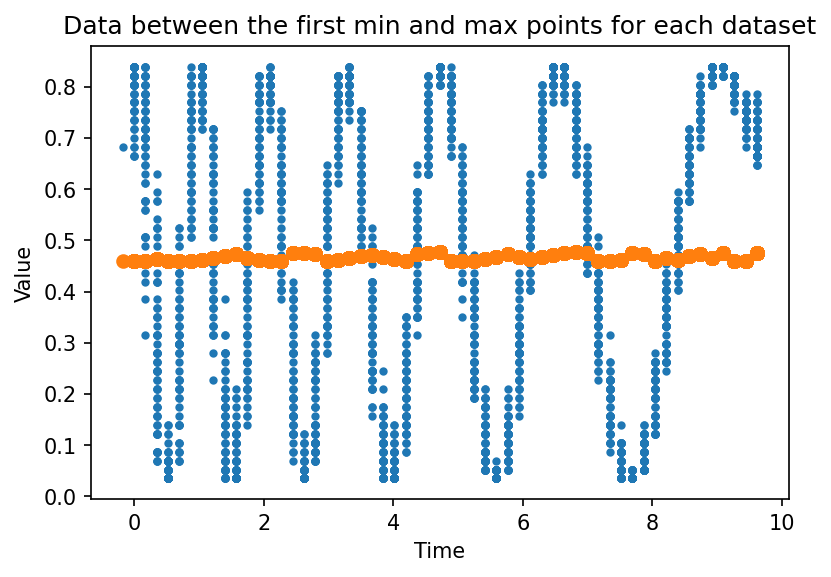

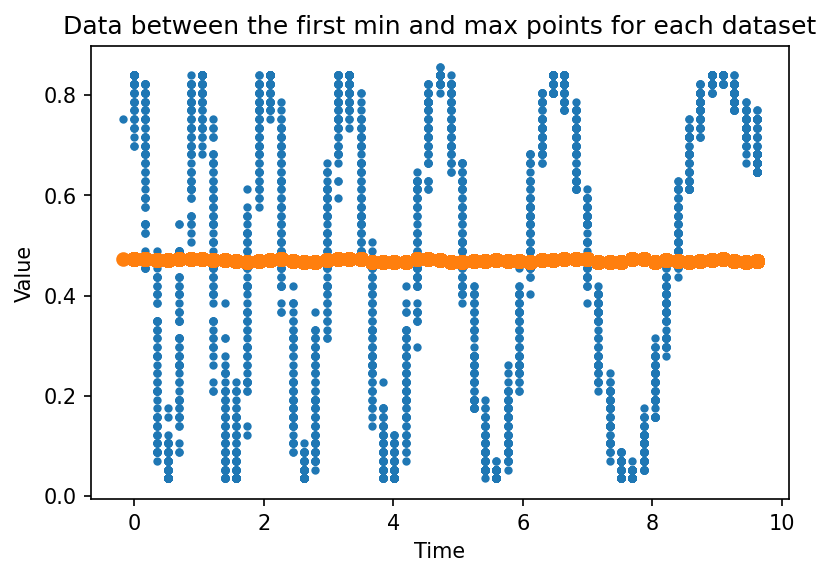

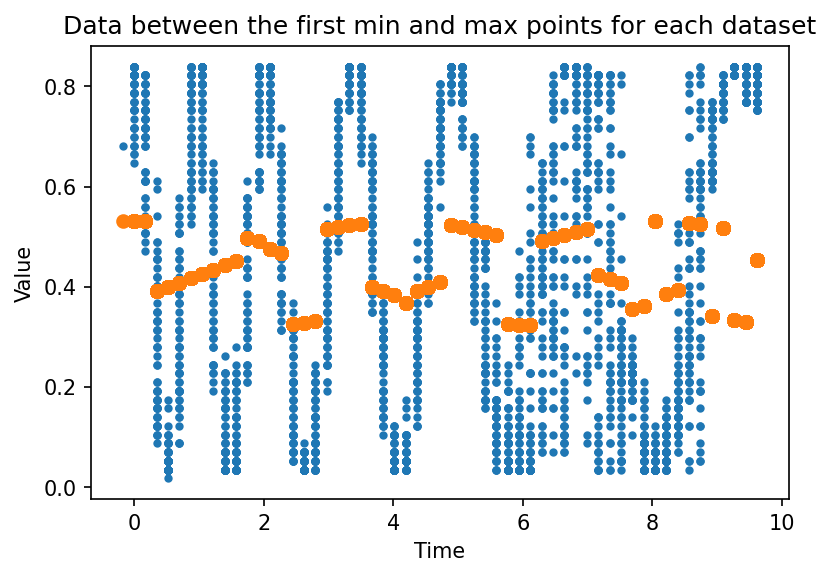

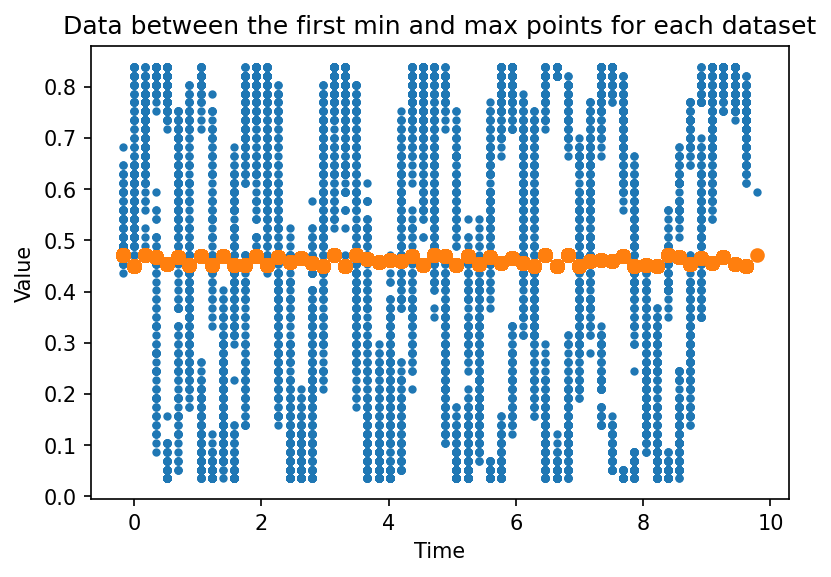

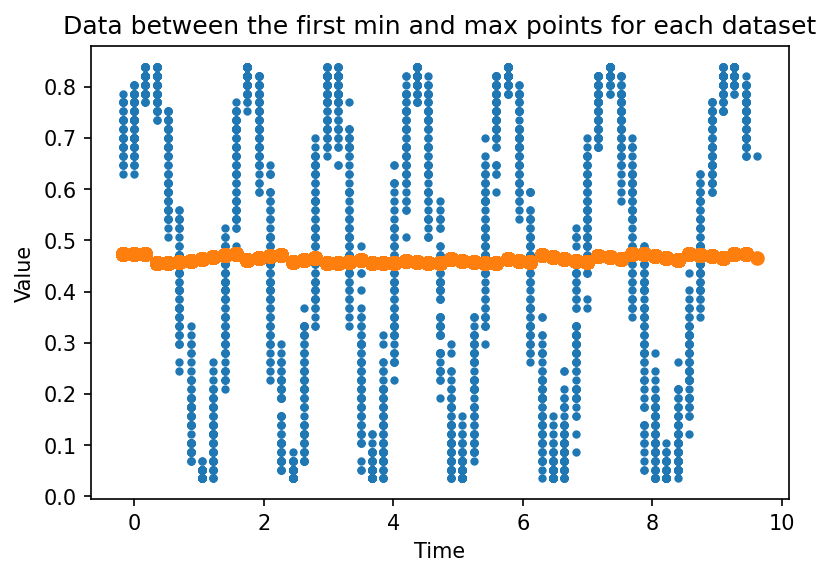

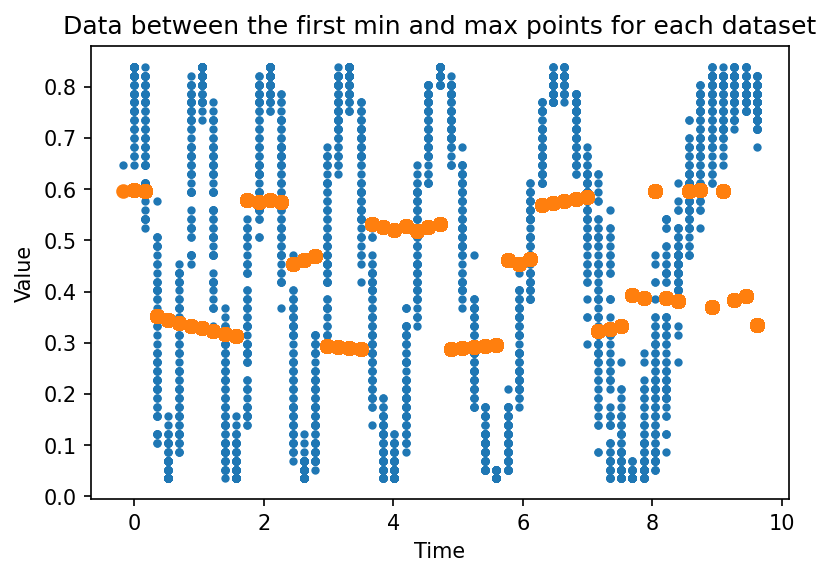

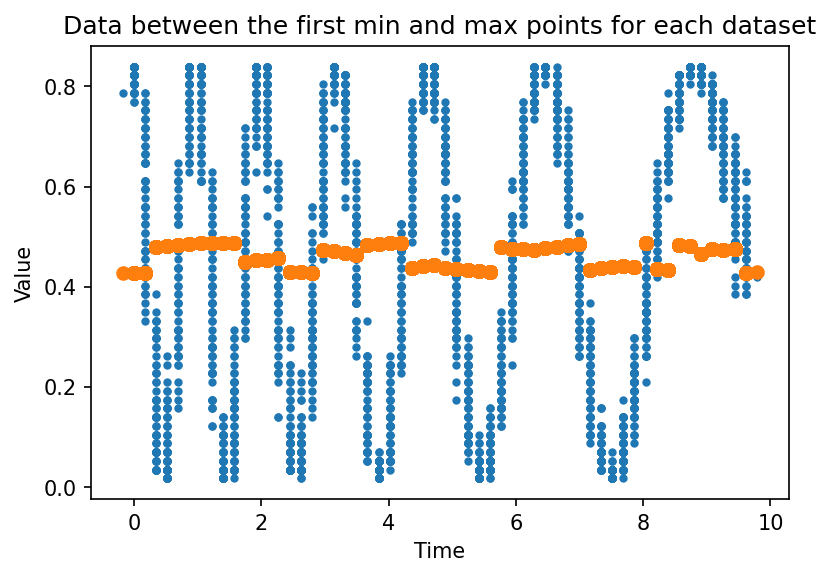

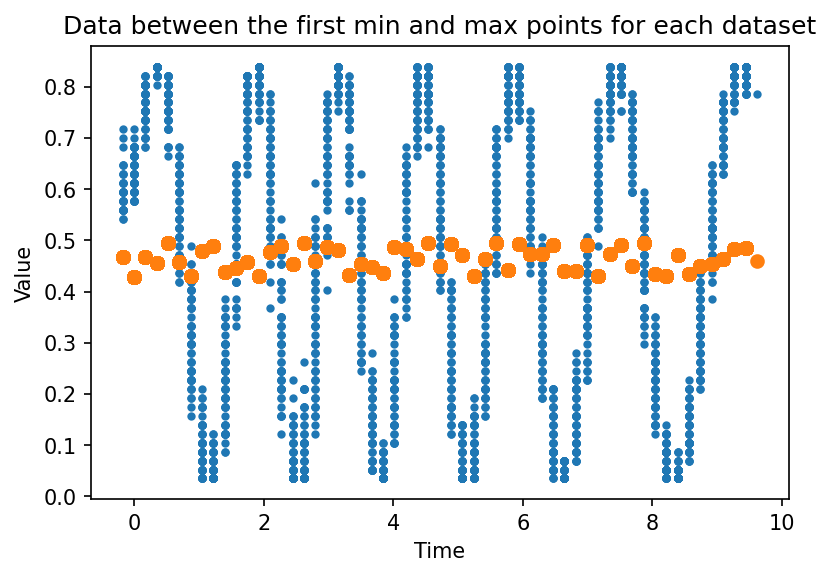

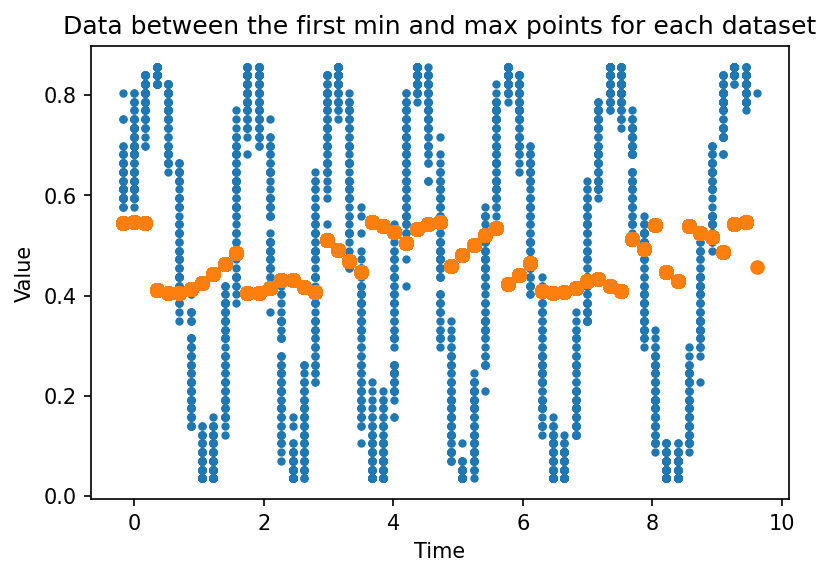

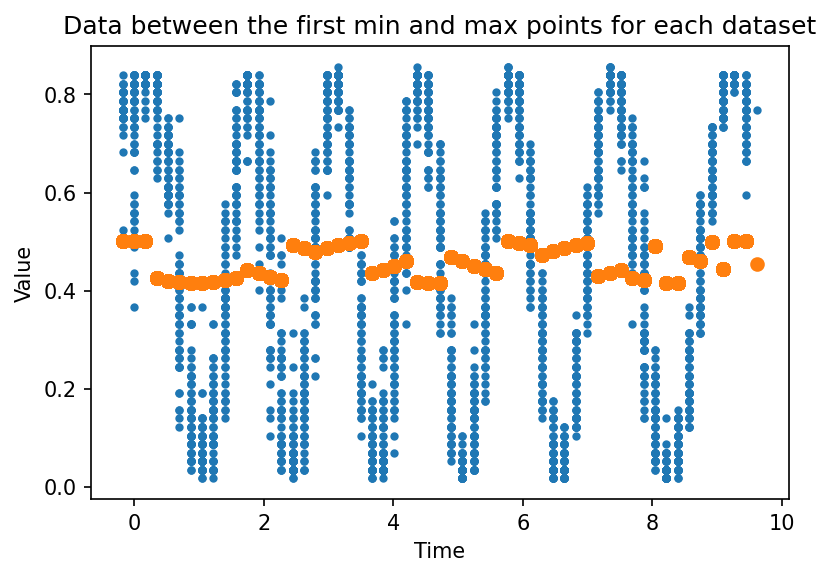

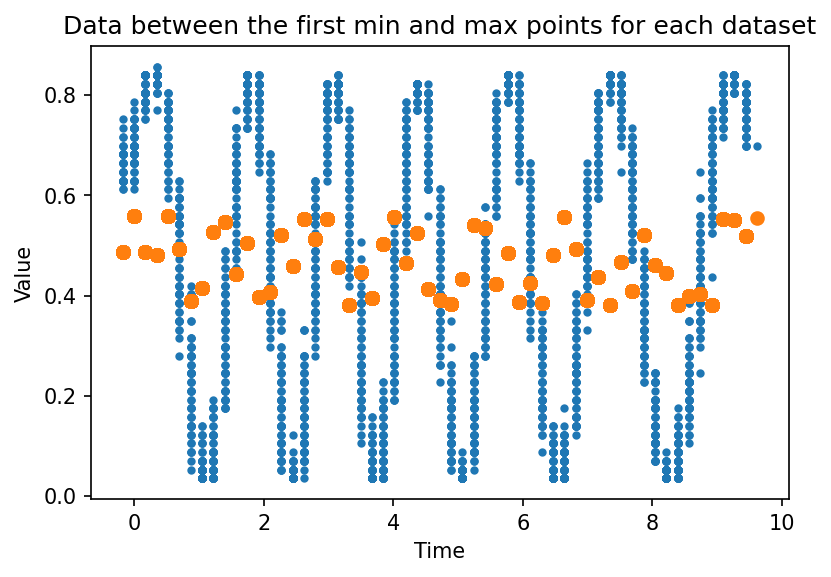

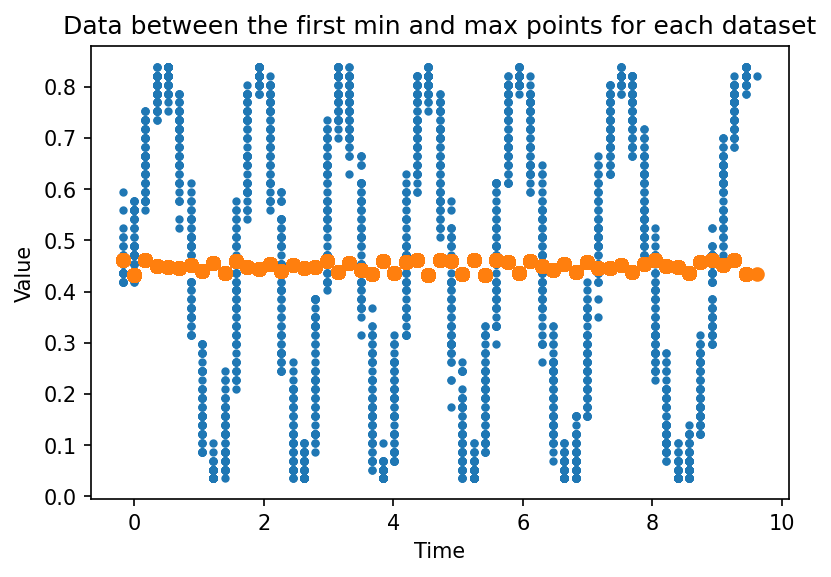

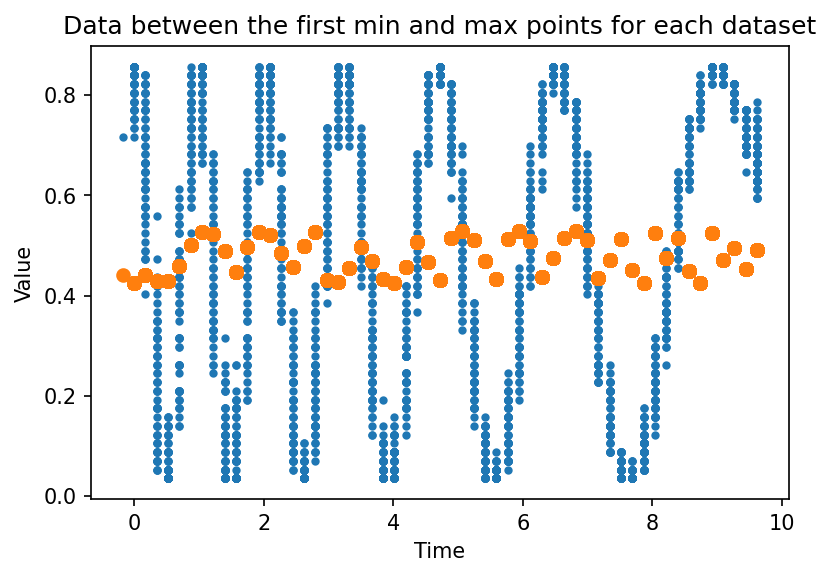

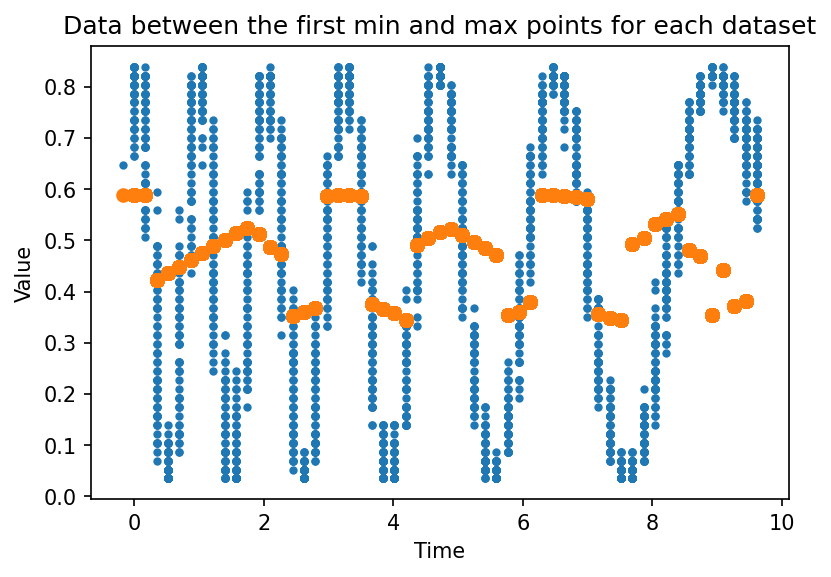

In [101]:
import matplotlib.pyplot as plt

a = (1/4)*c_light*eps0
b = (2*np.pi)/(600e-9) 

a_guess = a
k_guess = 2
c_guess = 1

p0_1= [a_guess, k_guess, c_guess]

def Intensity_fit(v,*p): #define fitting function
    a=p[0]
    k = p[1]
    c = p[2]
    return a * (1+np.cos(b*2*k*v))+c

# Plot the data between the first min and max points for each dataset
for data in data_between_min_max:
    plt.figure()
    time = data[:, 0]
    V1 = data[:, 1]  # Assuming V1 is the second column
    V2 = data[:, 2]  # Assuming V2 is the third column
    plt.plot(V2, V1,'.',label='V1')
    #plt.plot(time, V2, label='V2')

    popt, pcov = sp.curve_fit(Intensity_fit, V2, V1, p0=p0_1)
    plt.plot(V2, Intensity_fit(V2, *popt),'o',label='fit for both')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Data between the first min and max points for each dataset')
#plt.legend()
    plt.show()

In [98]:
print(np.sqrt(pcov[0][0]))

0.01039699610436127


Importing data
Data succesfully imported


/tmp/ipykernel_948/420836363.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Fitting begins


/tmp/ipykernel_948/420836363.py:162: RuntimeWarning: invalid value encountered in sqrt
  ps_cov2[j].append(np.sqrt(p_cov[j][j]))
/tmp/ipykernel_948/420836363.py:162: RuntimeWarning: invalid value encountered in sqrt
  ps_cov2[j].append(np.sqrt(p_cov[j][j]))


Fitting was succesfull


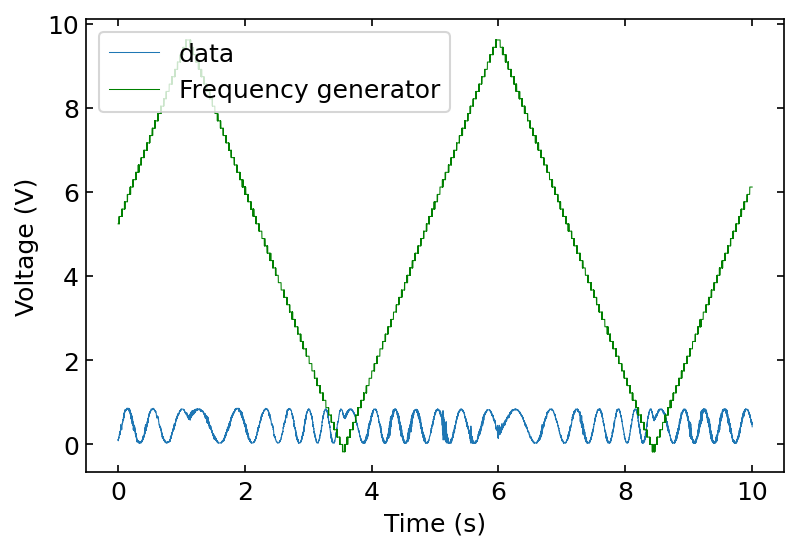

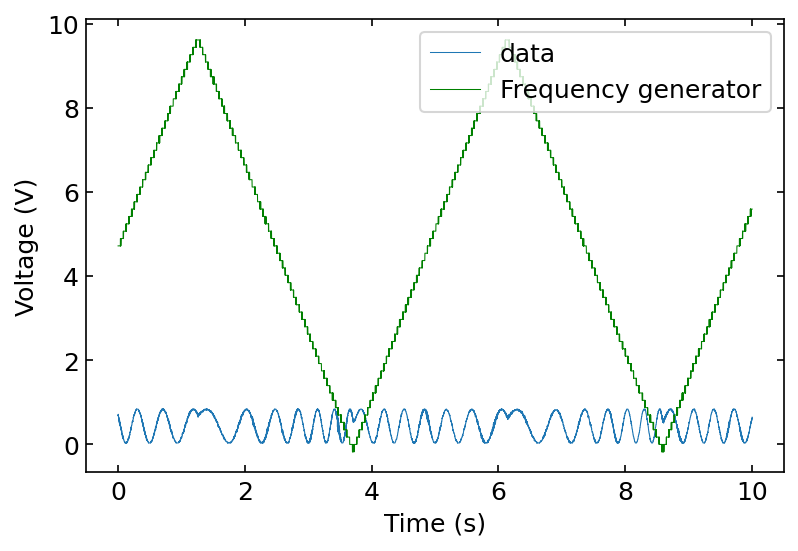

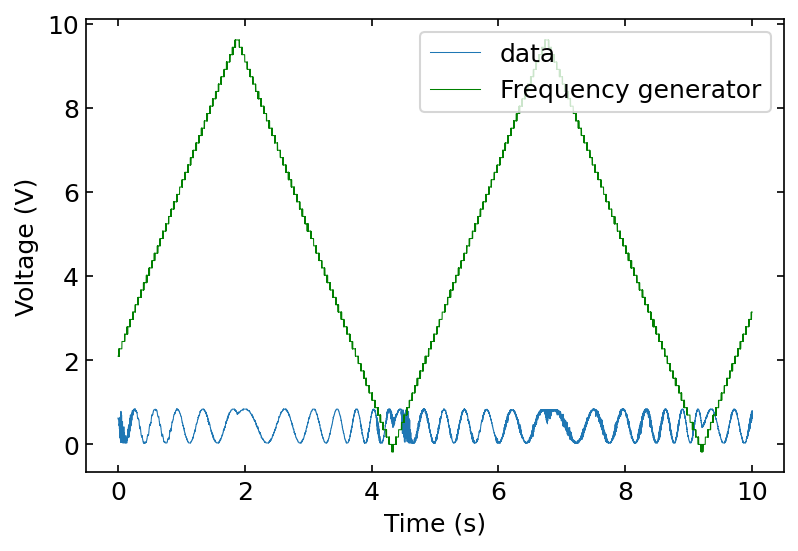

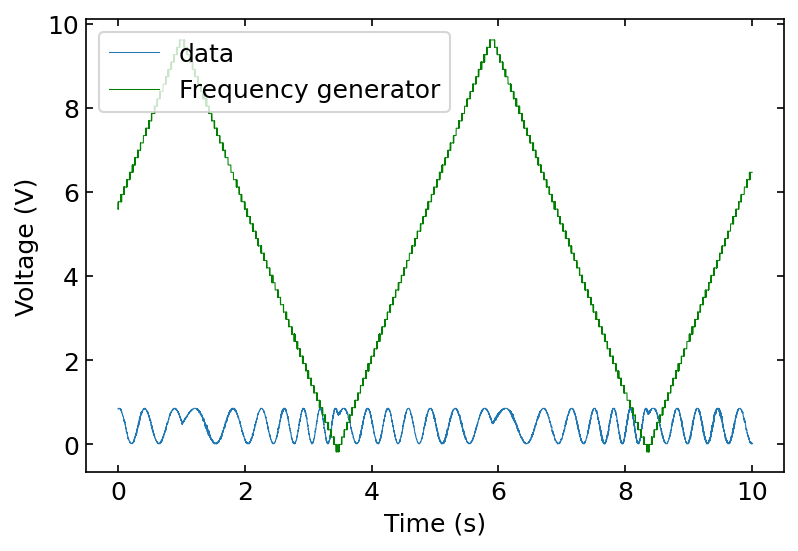

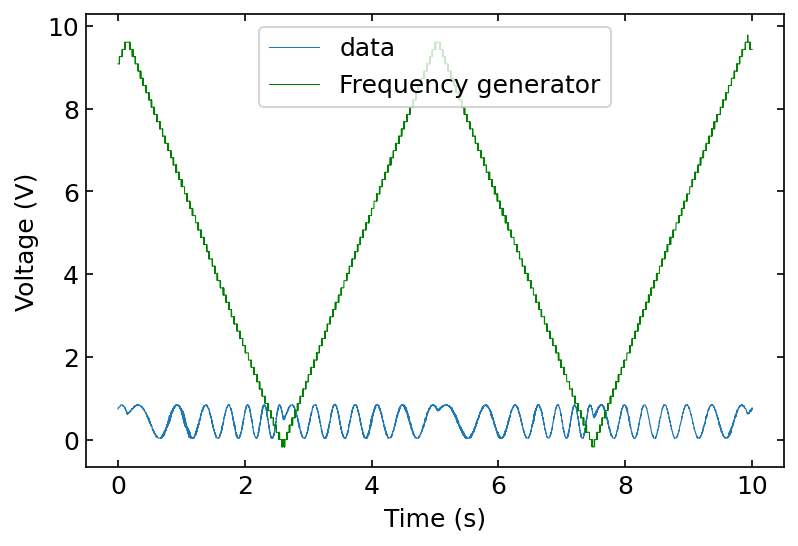

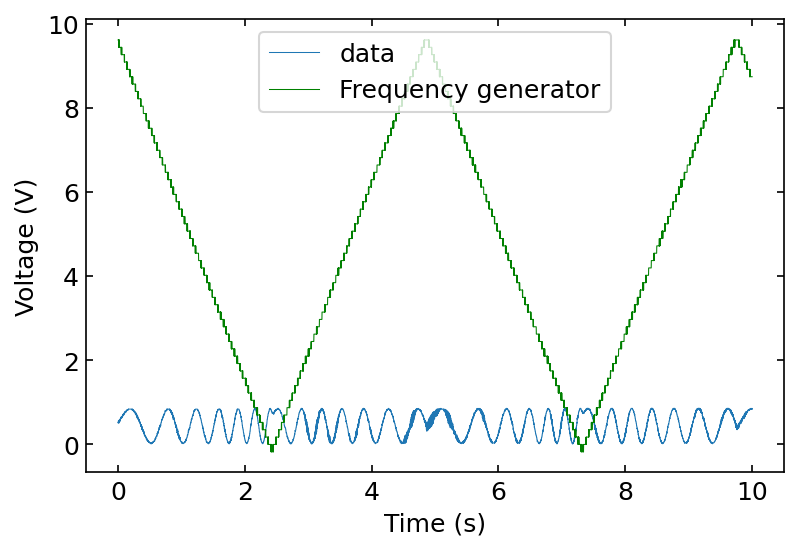

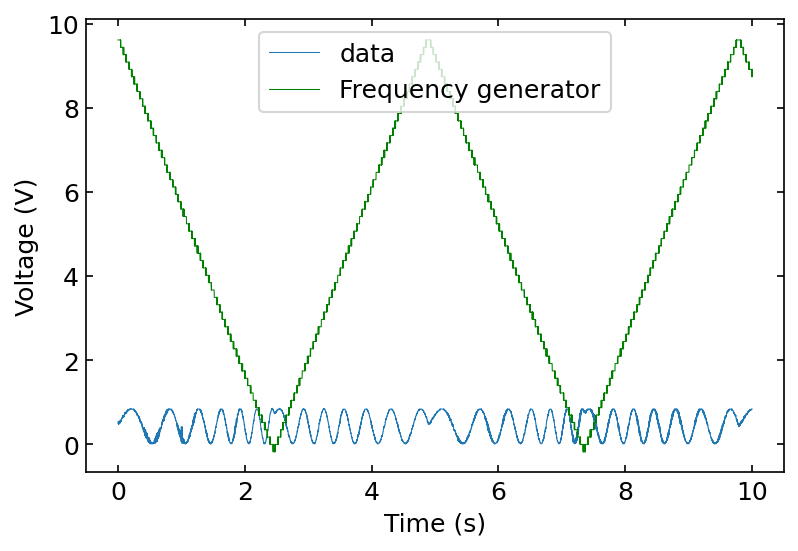

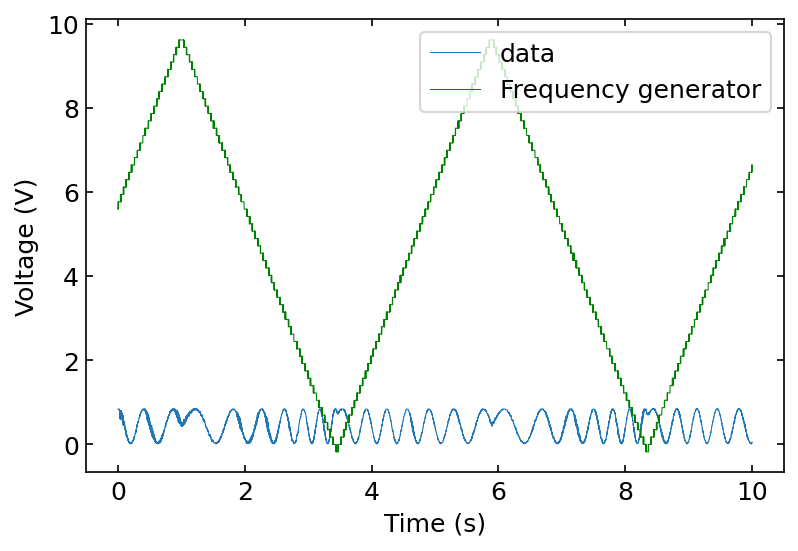

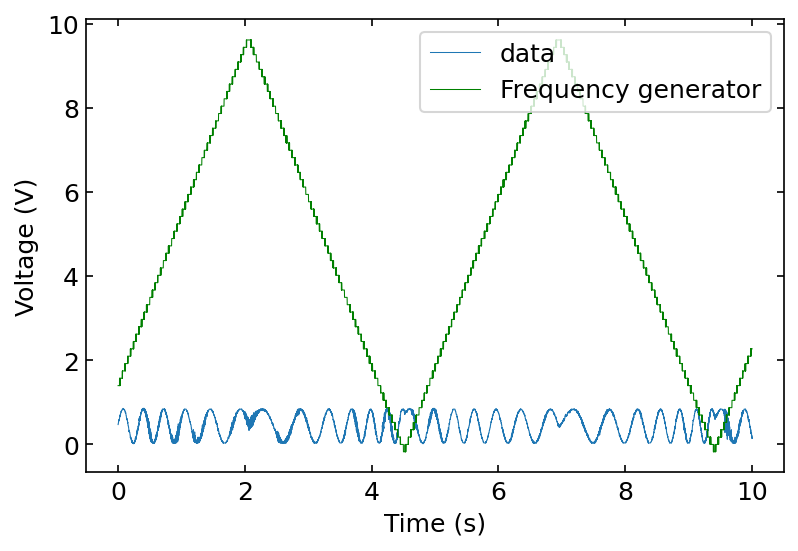

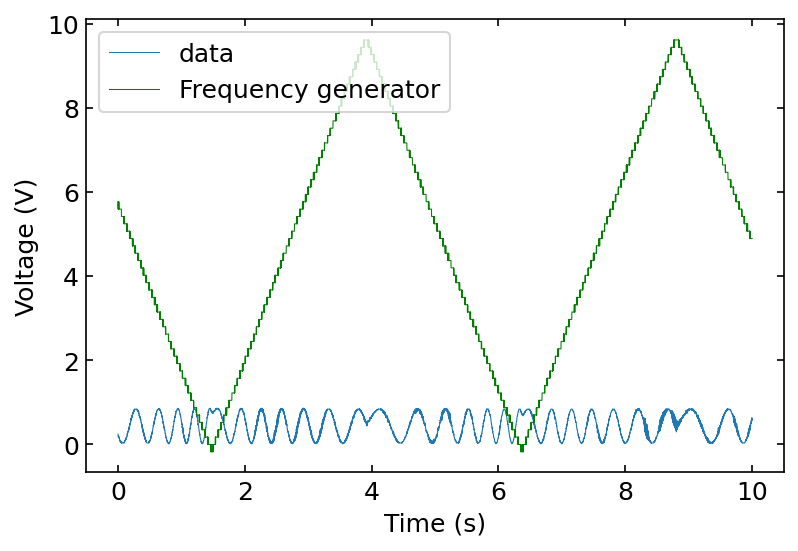

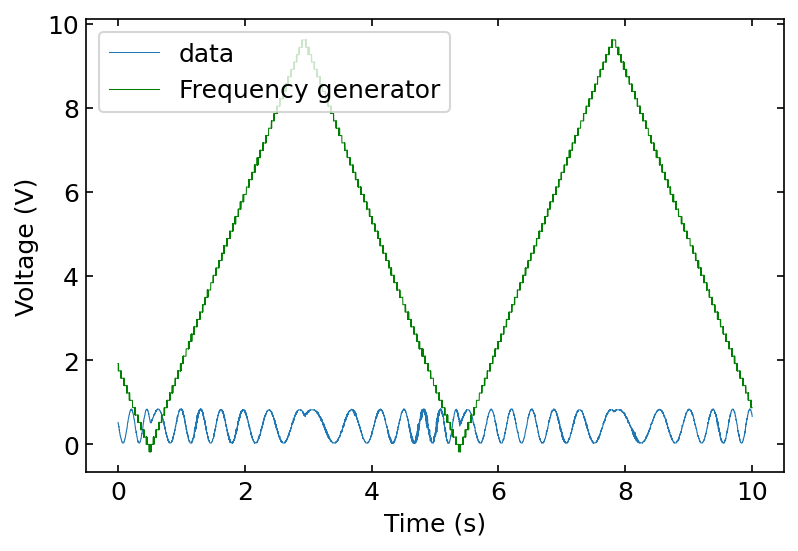

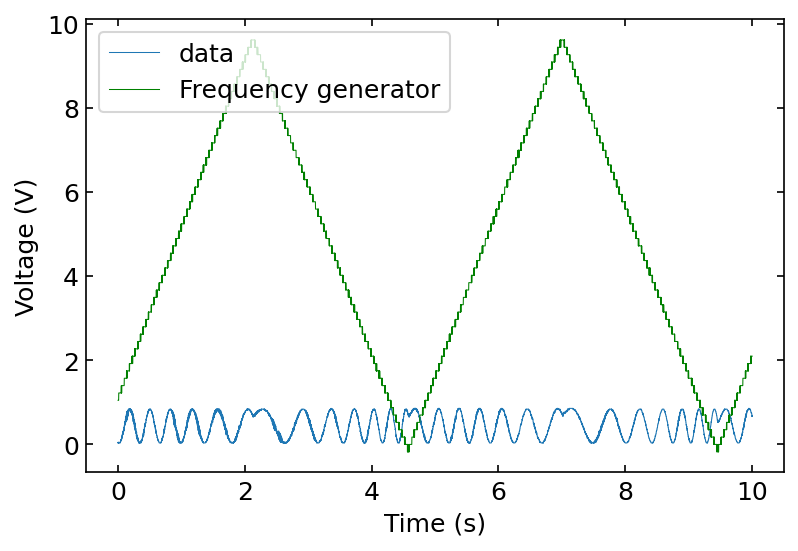

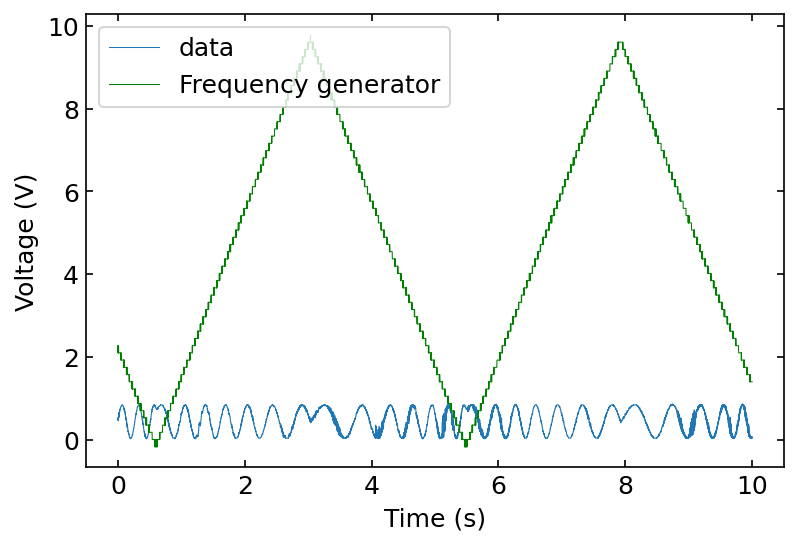

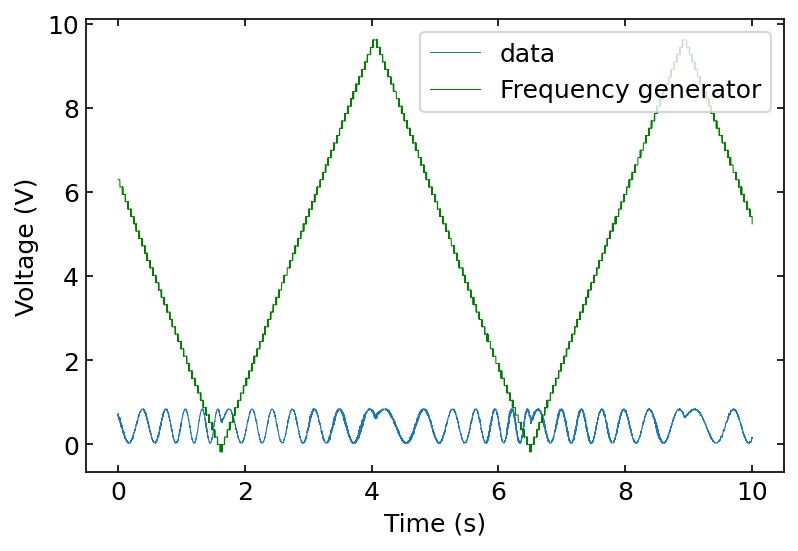

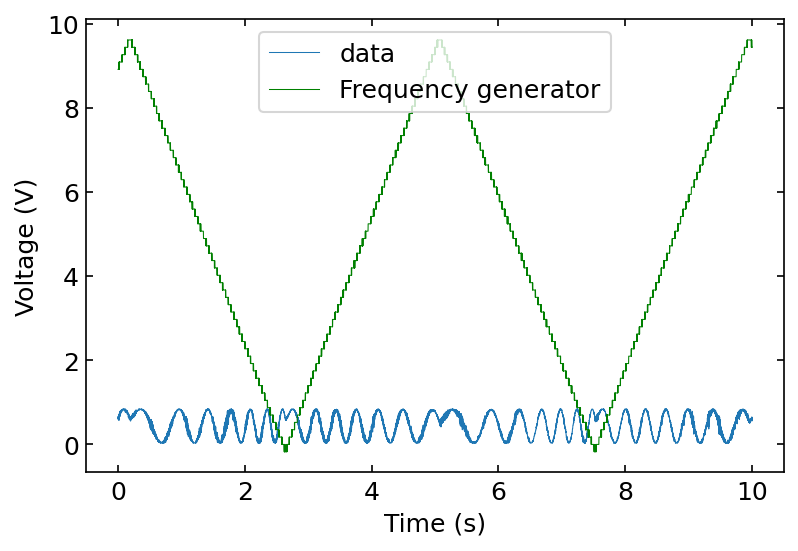

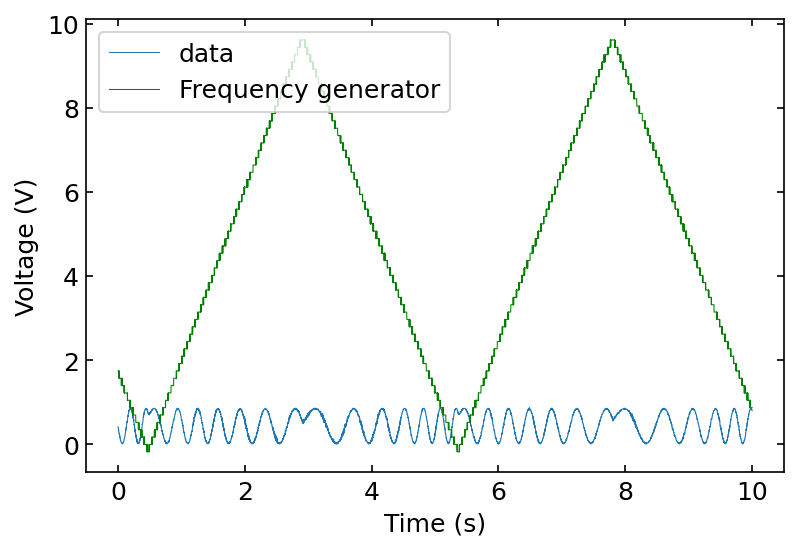

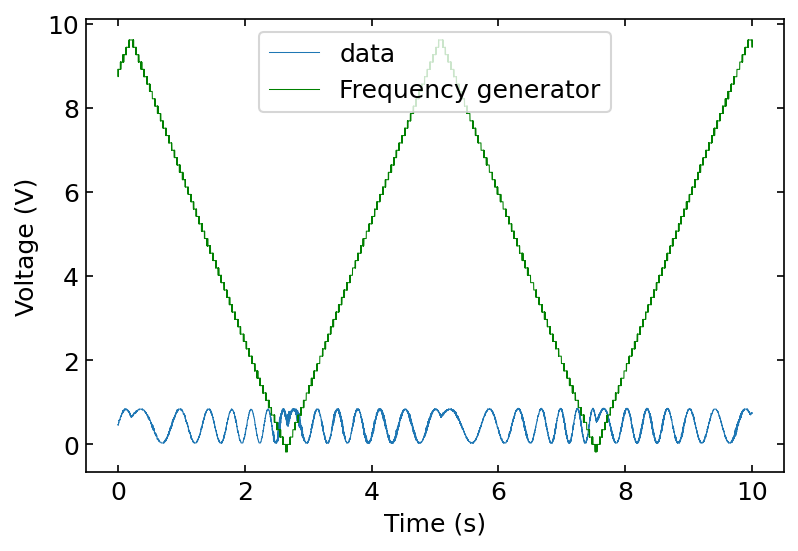

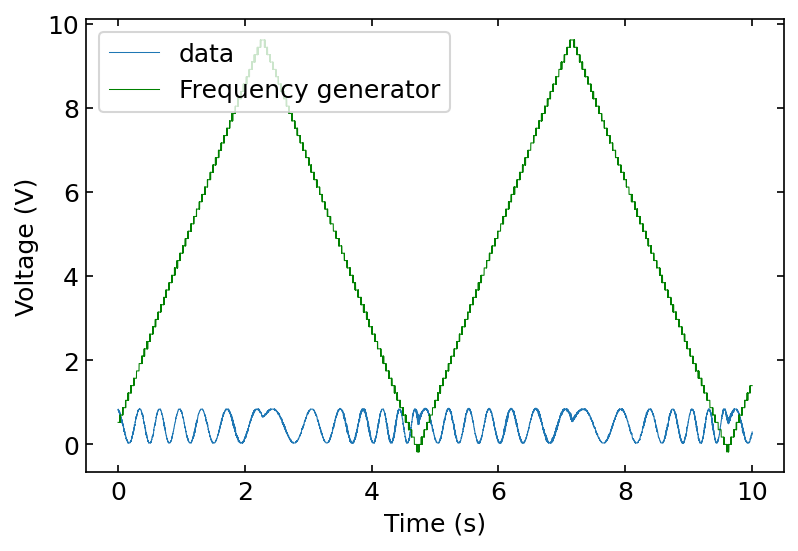

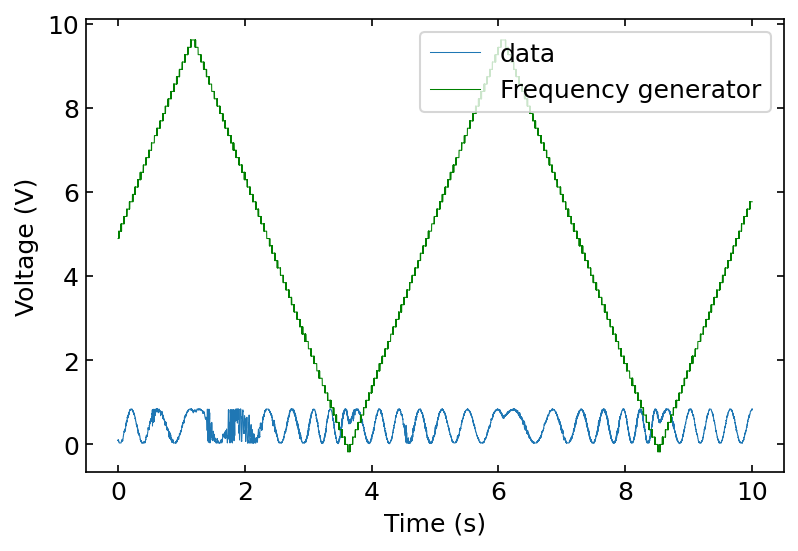

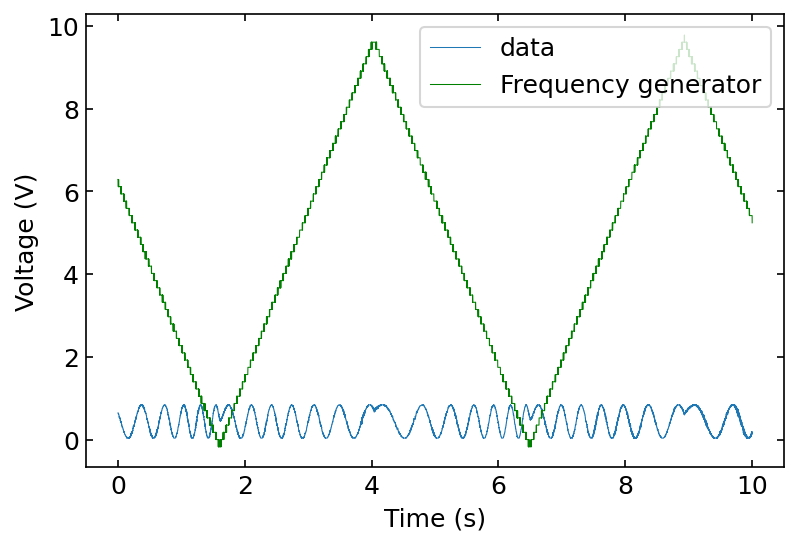

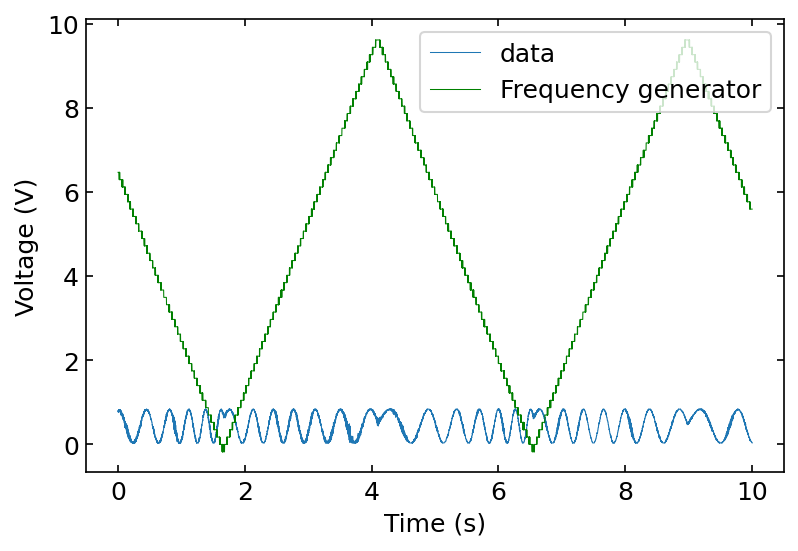

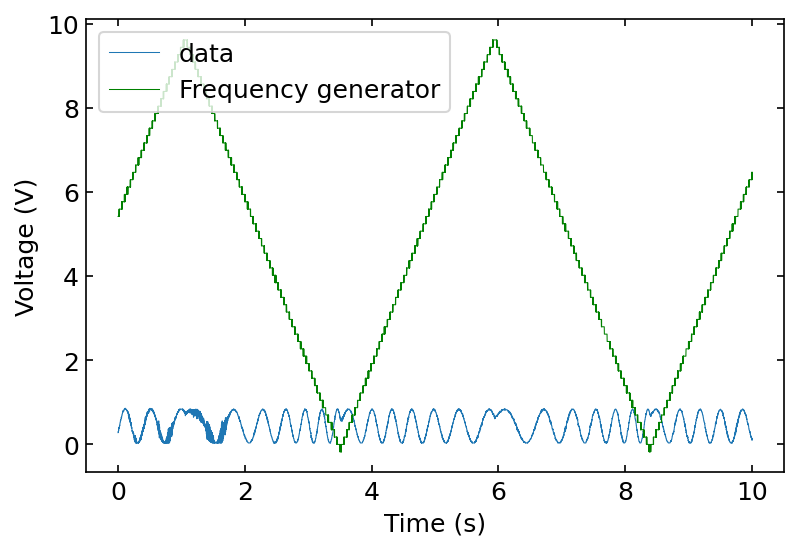

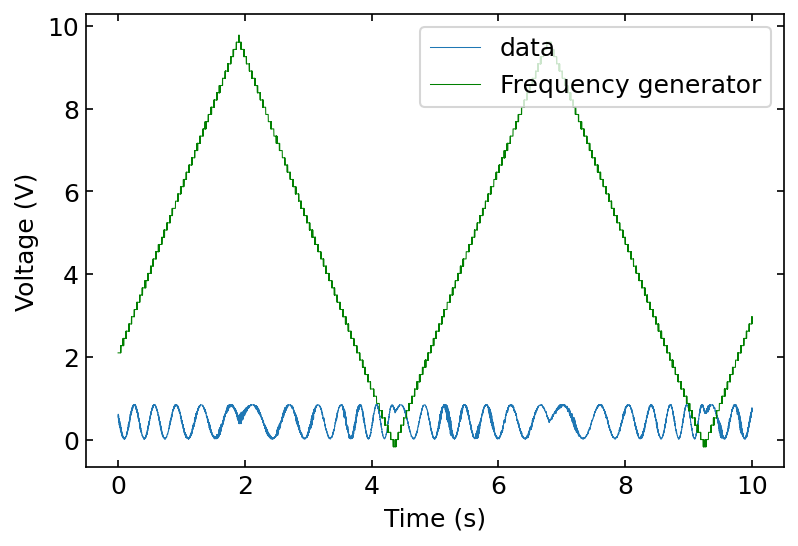

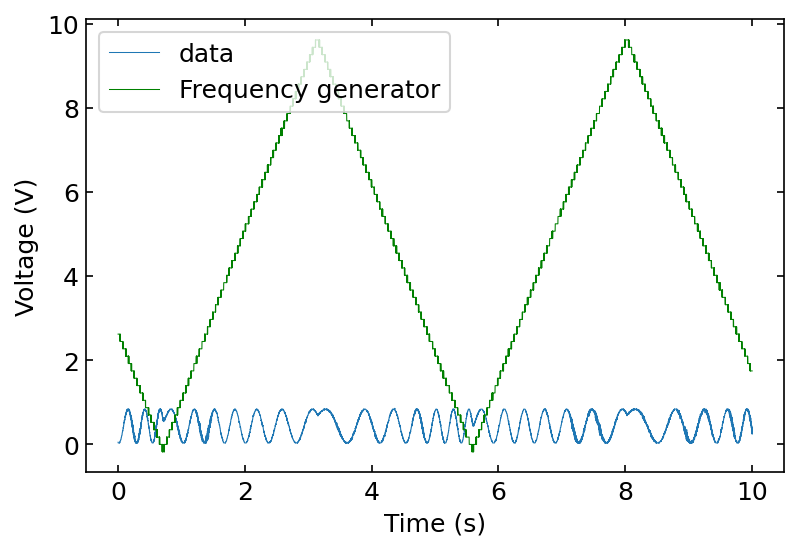

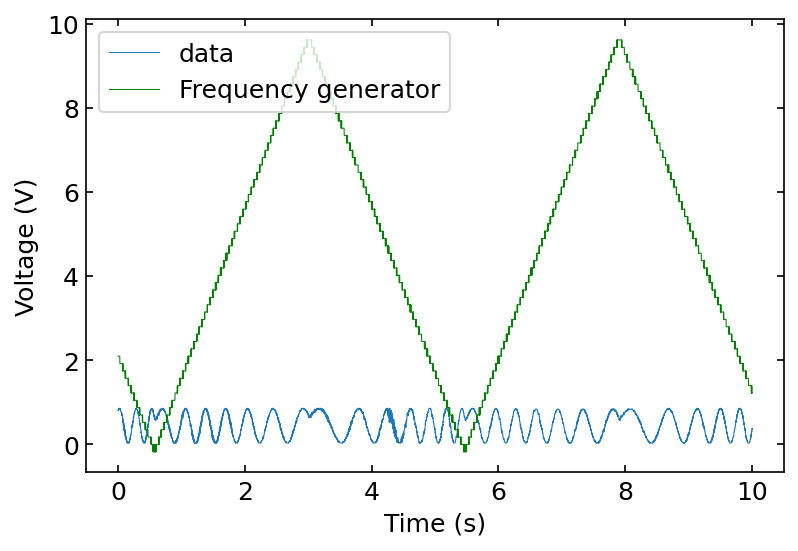

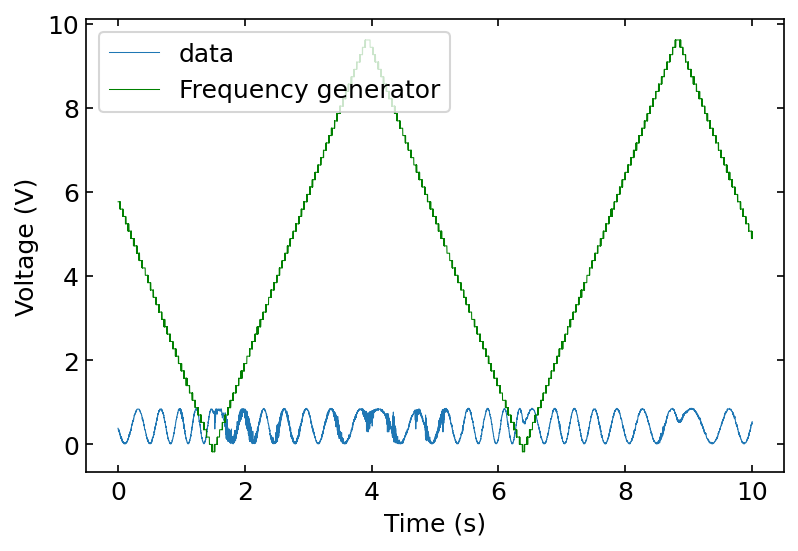

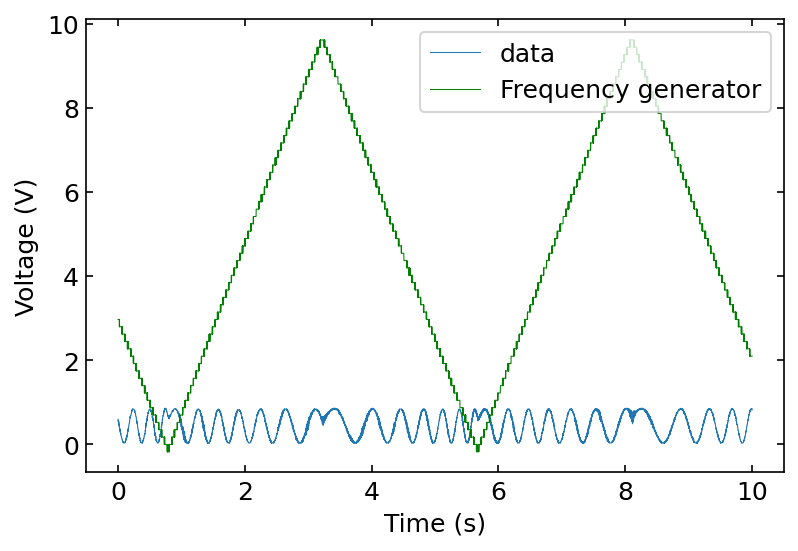

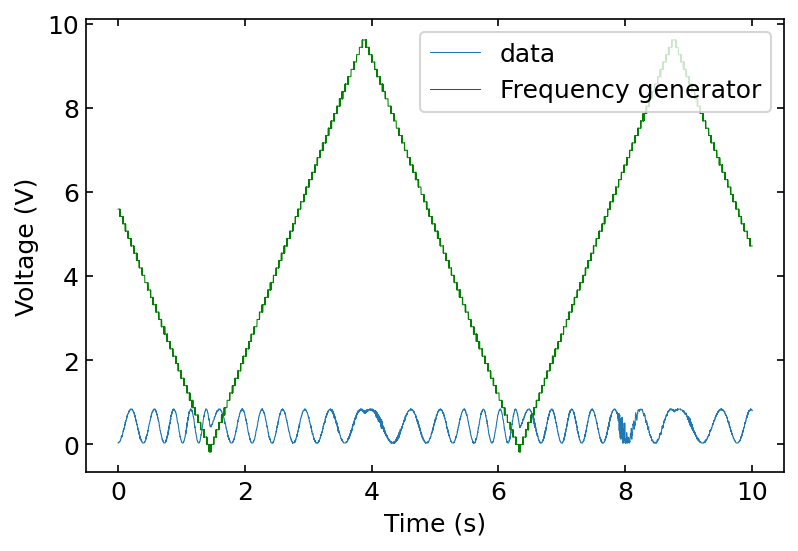

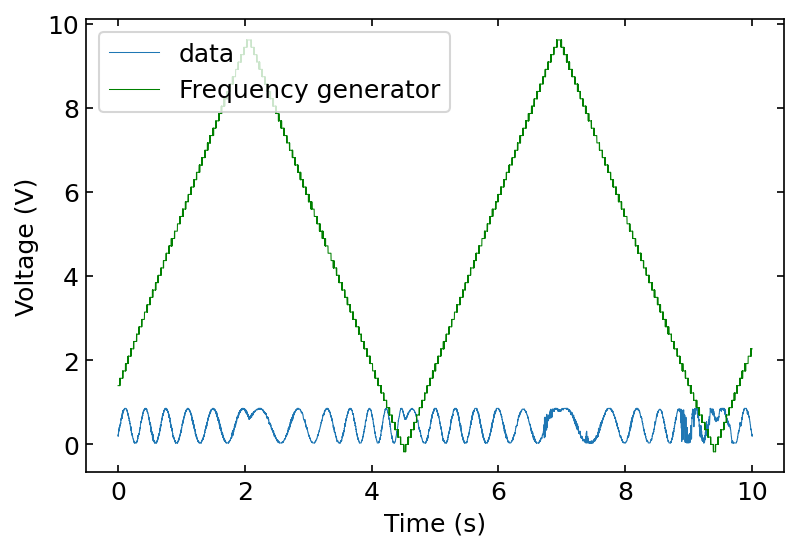

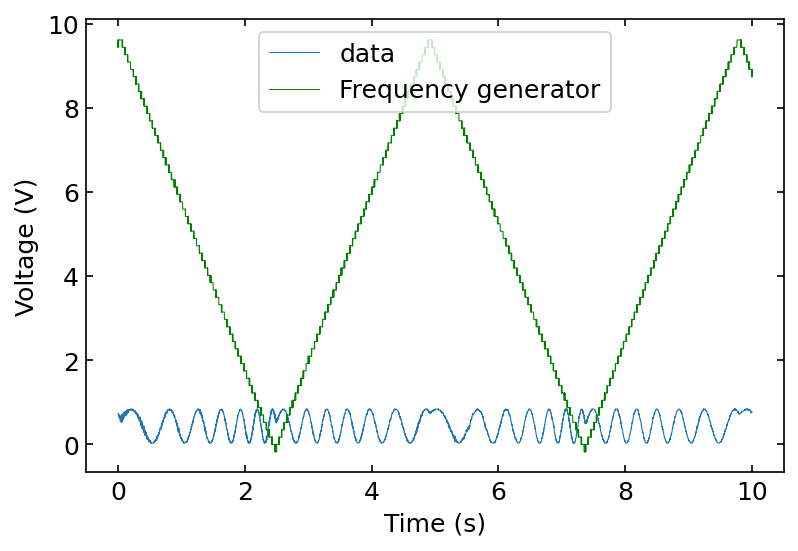

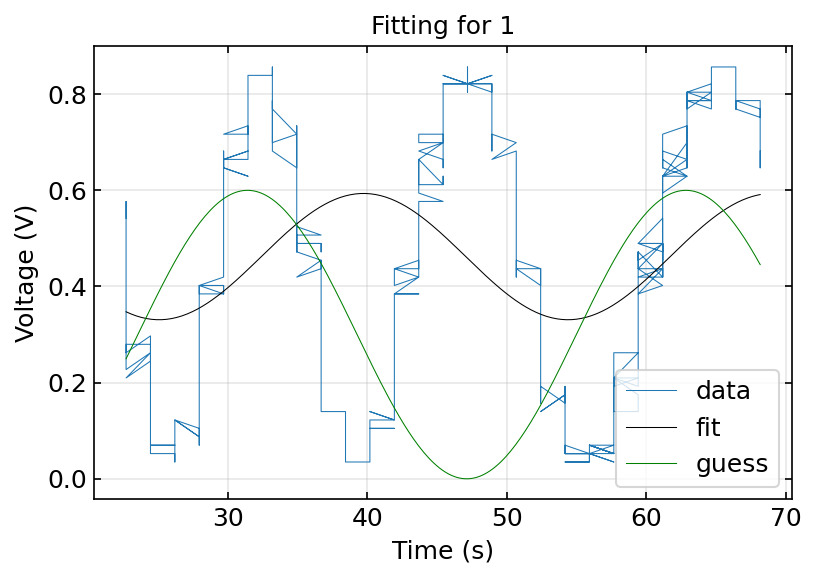

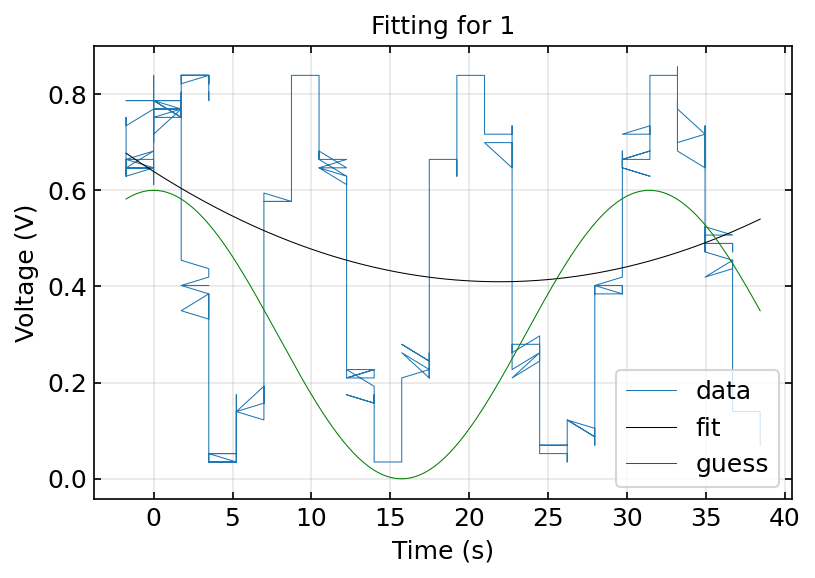

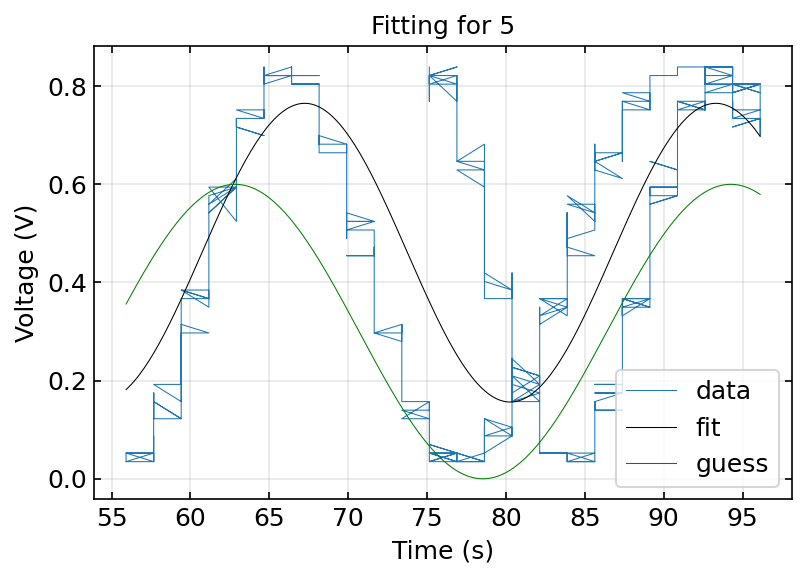

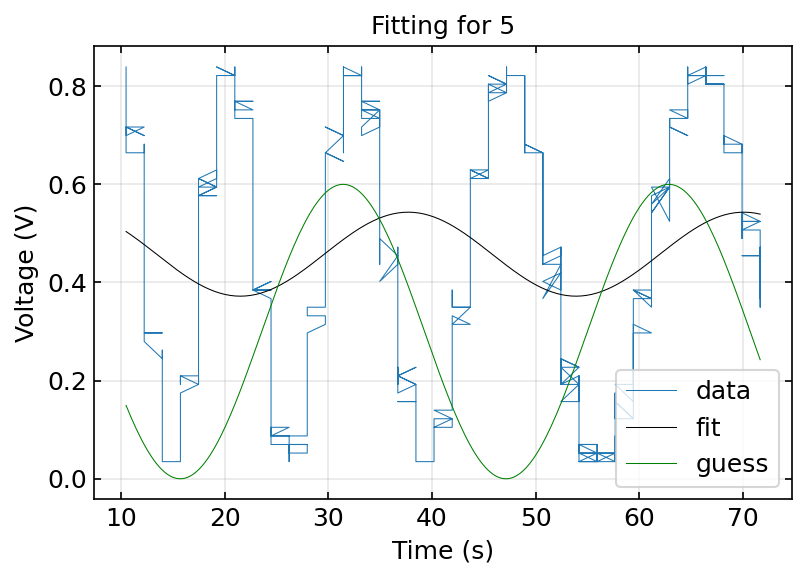

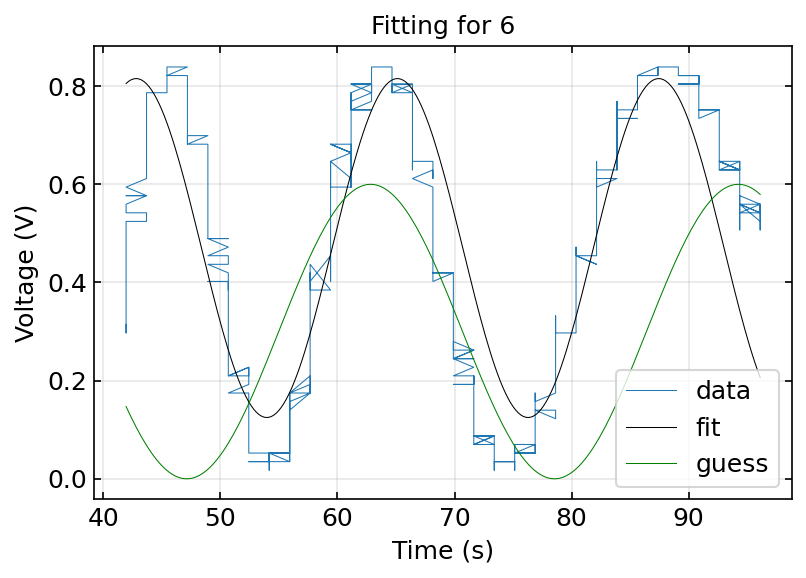

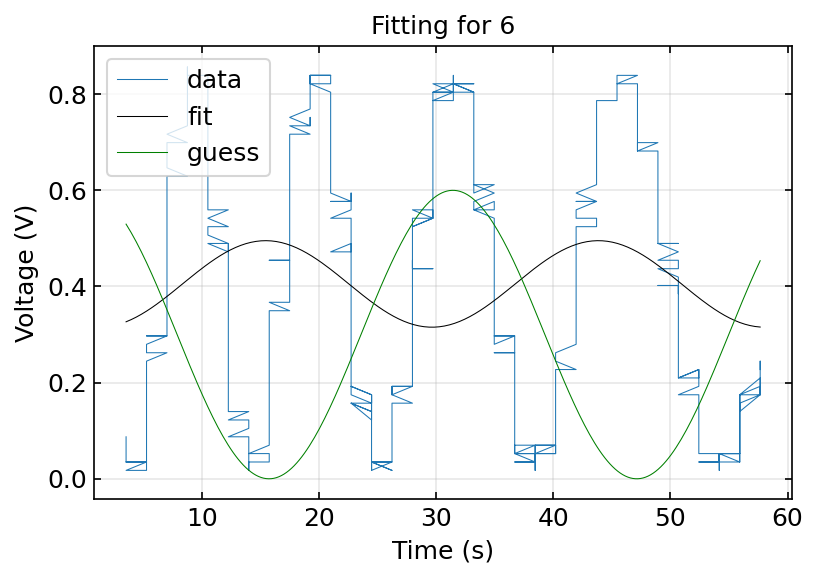

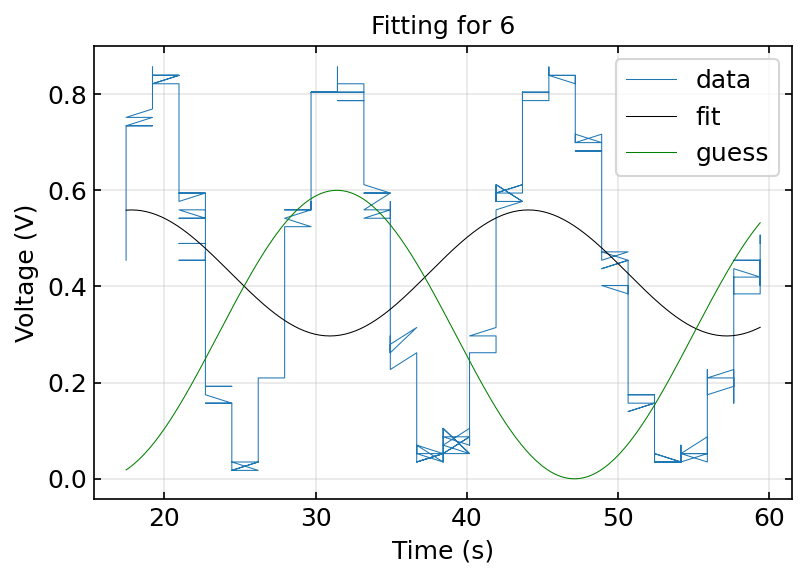

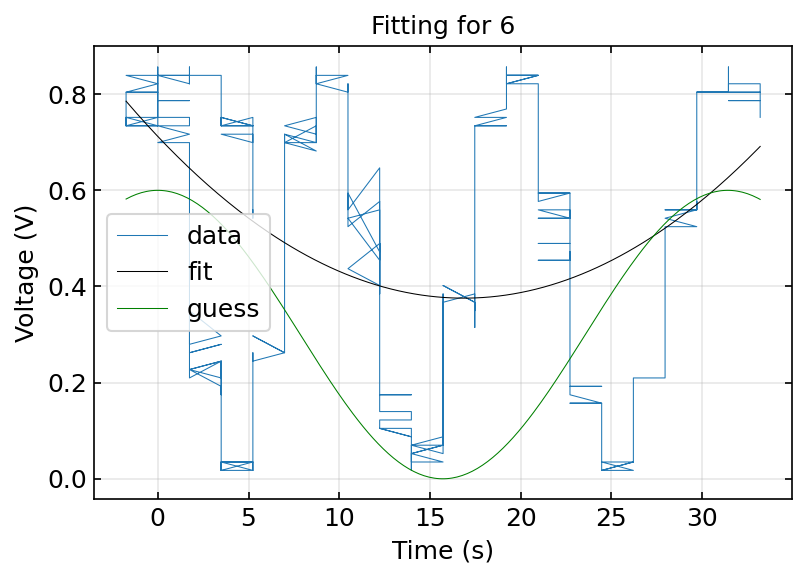

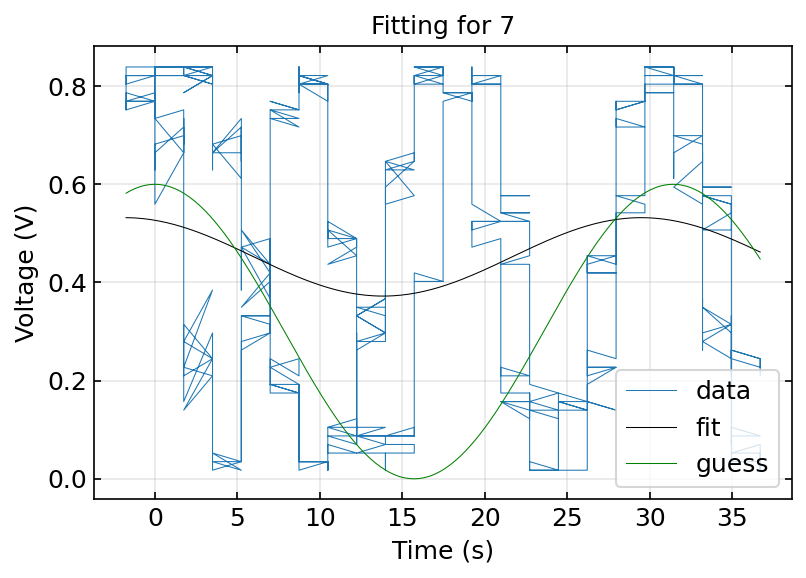

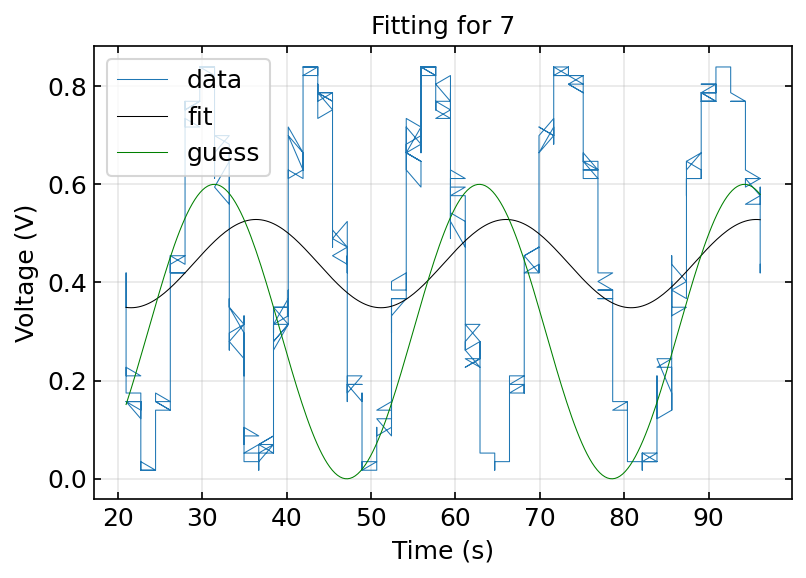

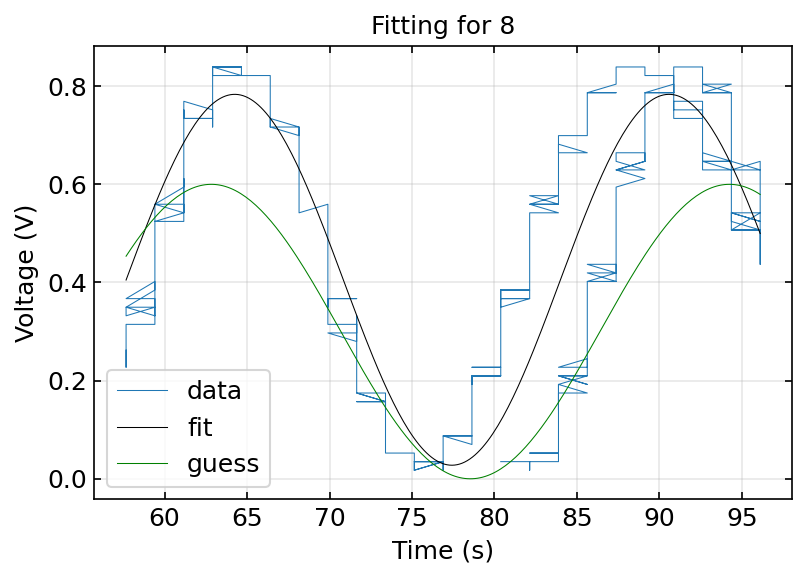

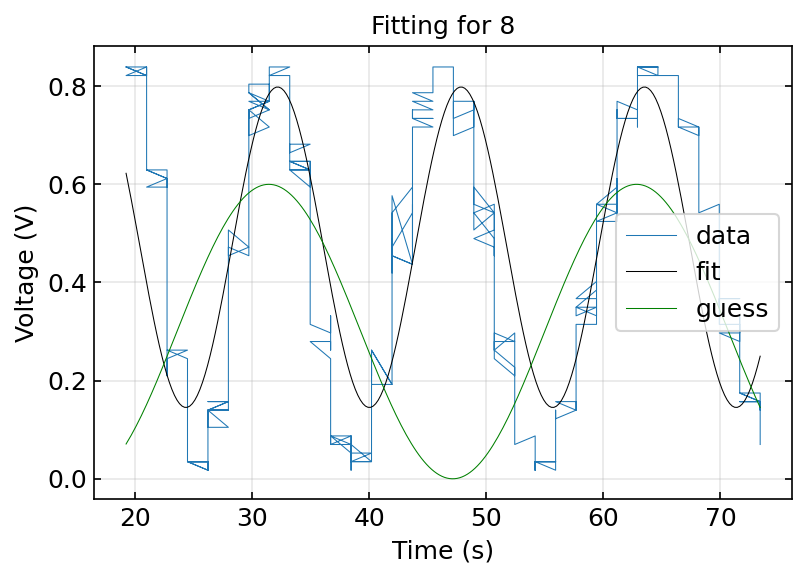

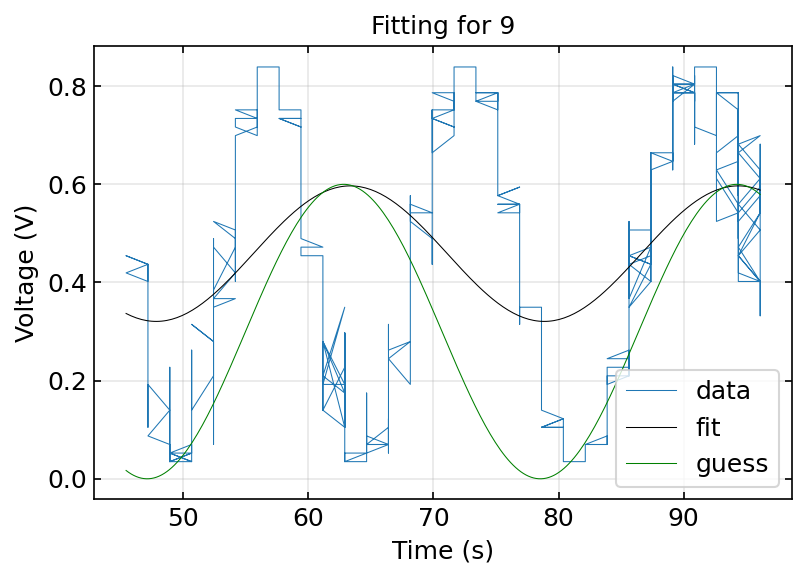

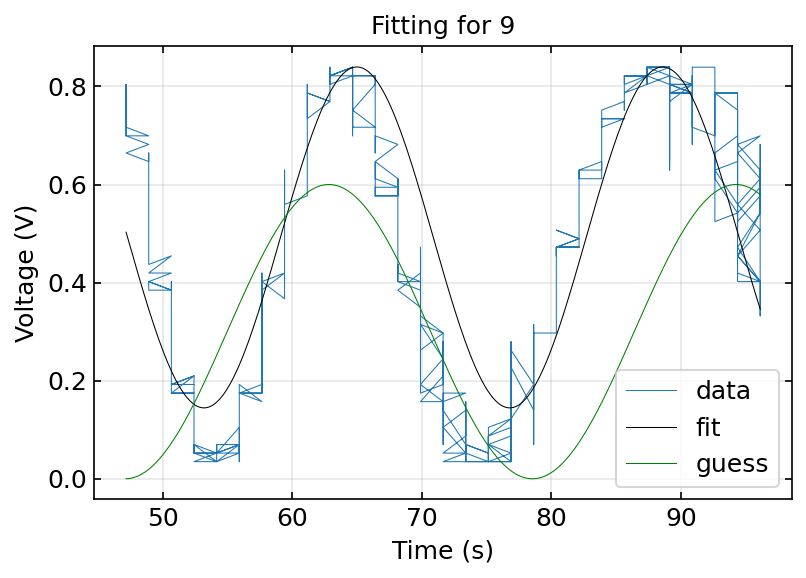

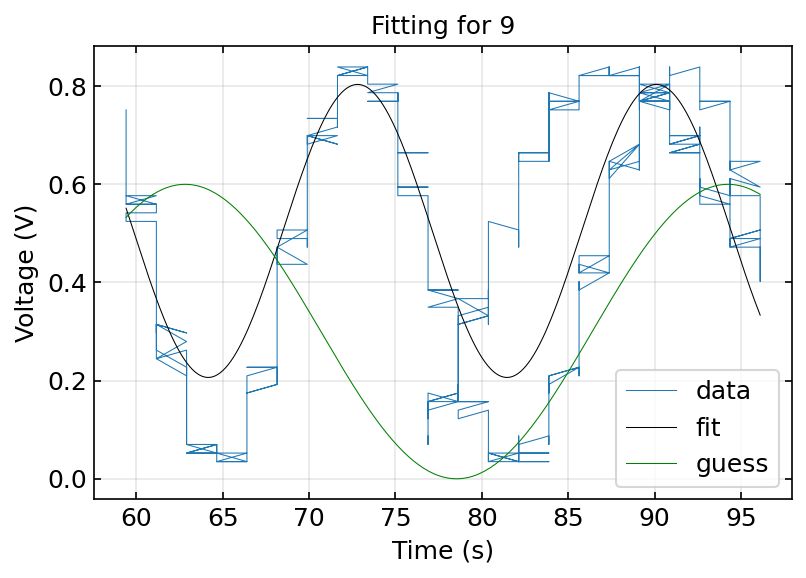

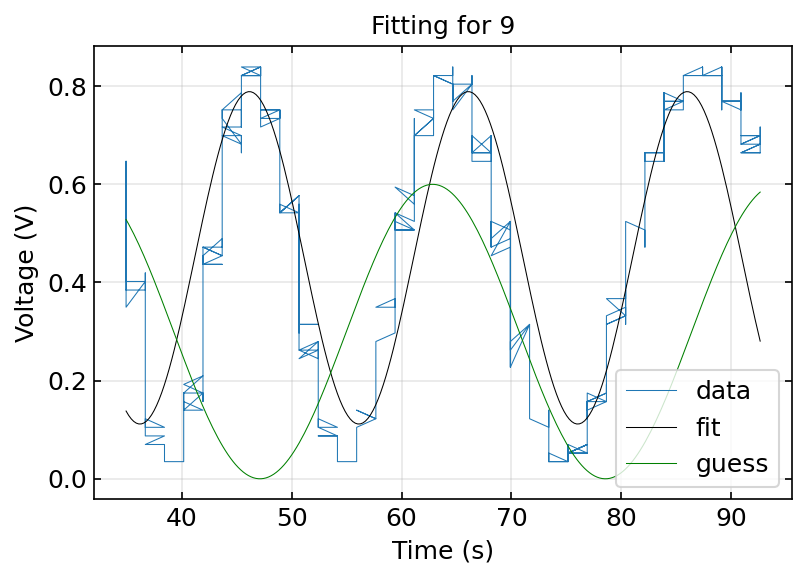

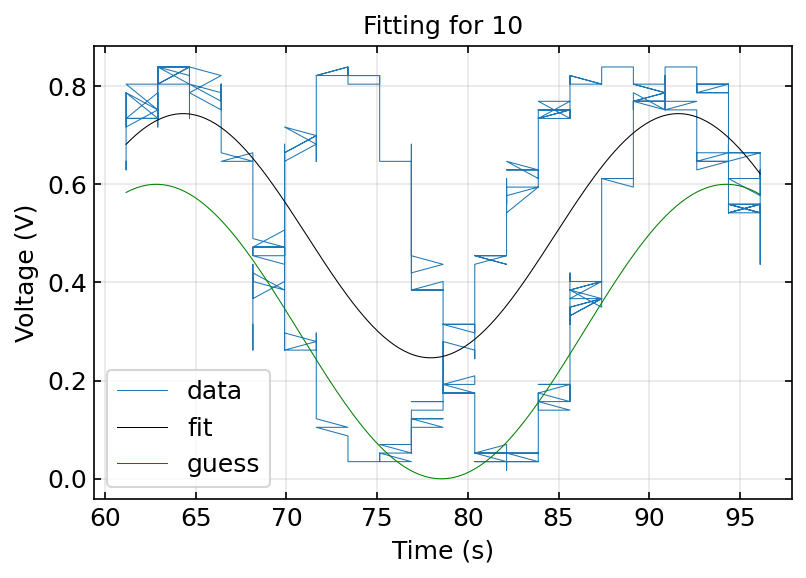

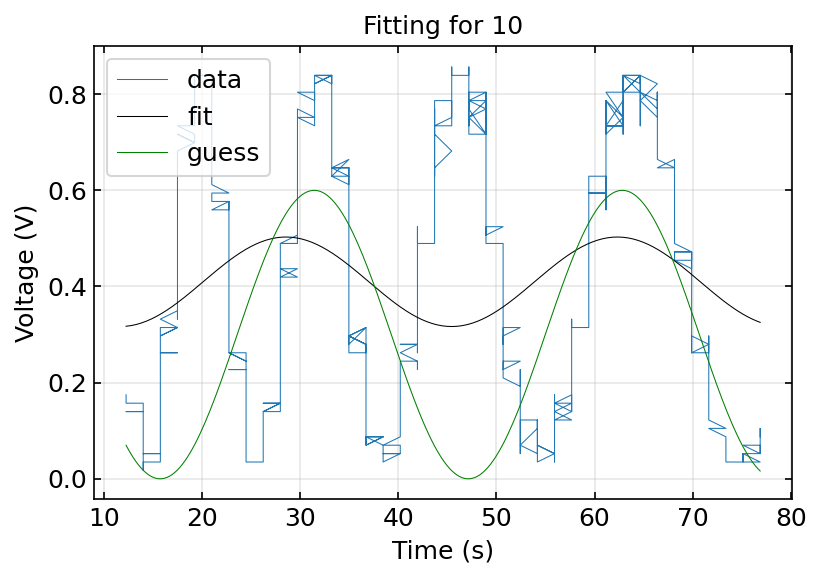

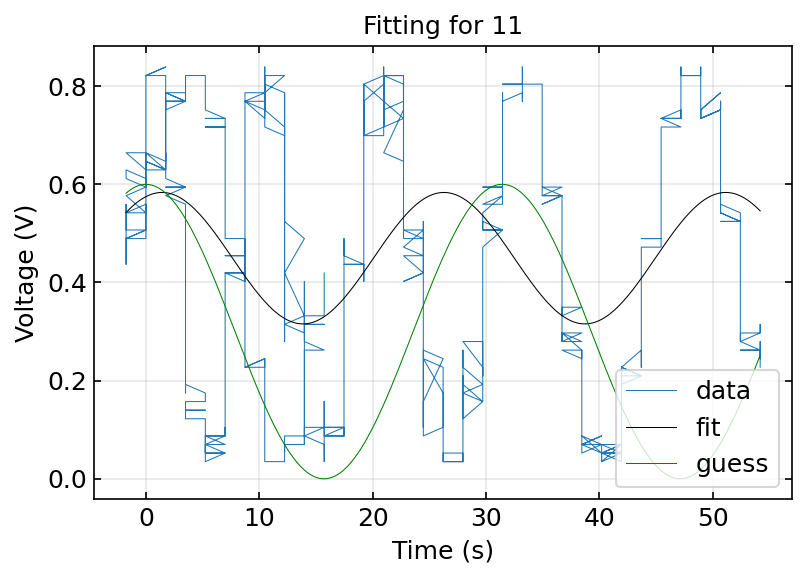

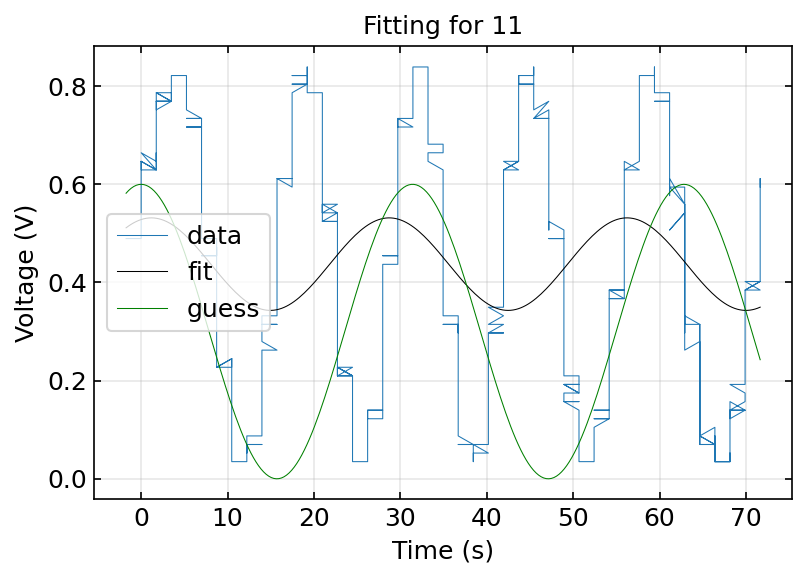

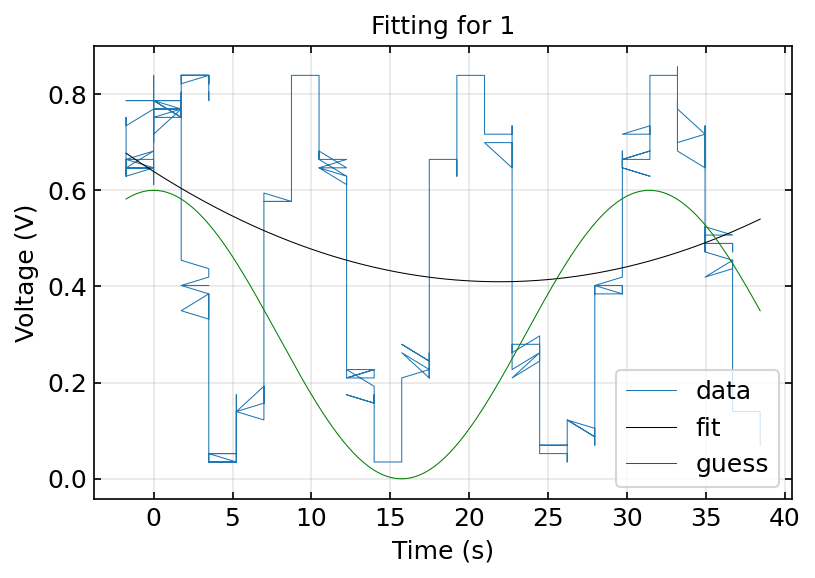

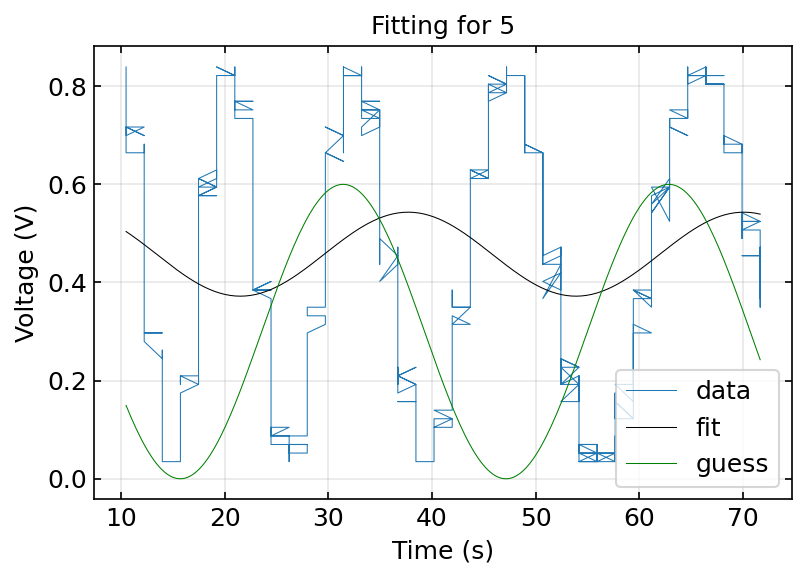

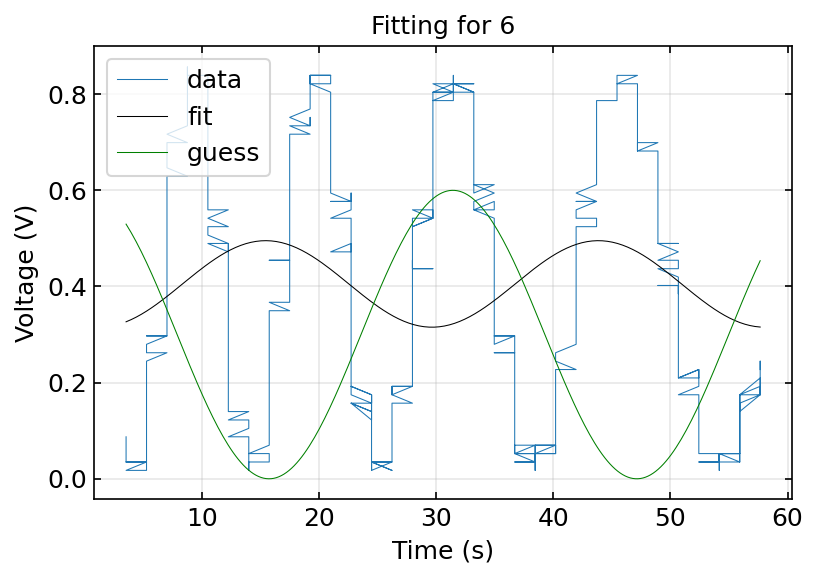

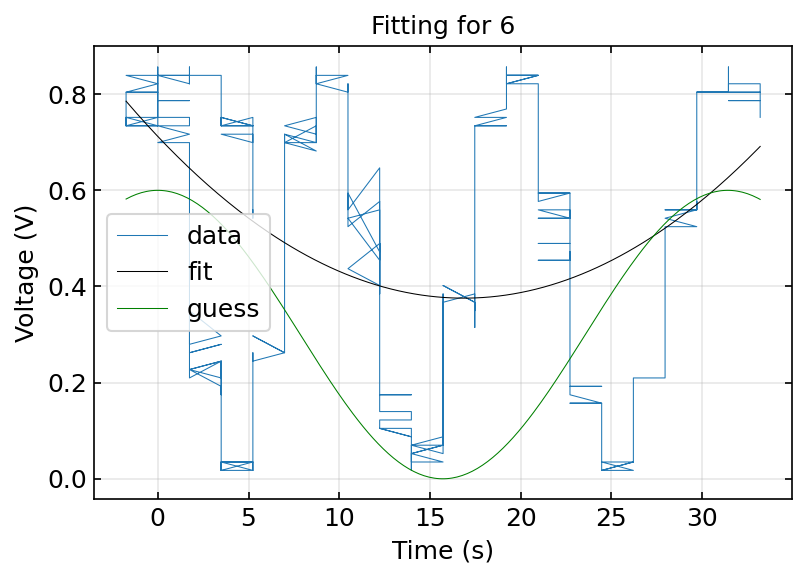

KeyboardInterrupt: 

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display

labelsize = 12 # Labelsize should be 7 in the end

# Universal layout for figures. Can be changed for the specific graph.
# plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
# plt.rc("text", usetex = False) # Not sure, what this does
plt.rc('axes', labelsize = labelsize, titlesize = labelsize) 
plt.rc('xtick', labelsize = labelsize, top = True, direction = 'in')
plt.rc('ytick', labelsize = labelsize, right = True, direction = 'in')
plt.rc('legend', fontsize = labelsize)
plt.rc('lines', linewidth = 0.5)
cm = 1/2.54
capsize = 1.2
alpha = 0.3

wavelength = 632.8 *10**-9 # wavelength of He-Ne laser

def theoretical_intensity(x, *p): # Defining theoreticla model
    A = p[0]
    w = p[1]
    n = p[2]
    c = p[3]
    I = A*np.cos(w * x + n) + c
    return I

A_guess = 0.3 # Defining guesses
w_guess = 0.2
n_guess = 0
c_guess = 0.3

p_init = [A_guess, w_guess, n_guess, c_guess]


files = [] # Preparing for importing data
times = []
channel_A = []
channel_B = []

print('Importing data')

#for i in range(11): # Importing data - range 11
 #   j = i + 1
#    path = fr'c:\Users\jakob\Desktop\Eksperimentiel fysik 2\Øvelse 2\Michelson interferometer filer\Michelson interferometer filer_{j}.txt'
 #   file = np.genfromtxt(path, delimiter = '\t', skip_header = 2)
 #   files.append(file)
    
 #   time = file[:, 0]
  #  A = file[:, 1]
   # B = file[:, 2]
   # times.append(time)
   # channel_A.append(A)
   # channel_B.append(B)
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

for data in Data_list:
    time =data[:,0]
    A = data[:, 1]  # Assuming V1 is the second column
    B = data[:, 2]  # Assuming V2 is the third column
    times.append(time)
    channel_A.append(A)
    channel_B.append(B)

    


print('Data succesfully imported') # Informing the user, that the data has succesfully imported

def figure(time, A, B): # Defining how to plot the raw data
    fig, ax = plt.subplots()
    ax.plot(time, A, color = 'tab:blue', label = 'data')
    ax.plot(time, B, color = 'green', label = 'Frequency generator')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.legend()

figures = [] # Potentially plotting the raw data
for time, A, B in zip(times, channel_A, channel_B):
    figures.append(figure(time, A, B))

plt.show()

def fitting(file_number, lower_limit, upper_limit, guess = p_init): # Defineing how fitting in a certain interval is done 
    mask = [t >= lower_limit and t <= upper_limit for t in times[file_number]]
    time = times[file_number][mask]
    A = channel_A[file_number][mask]
    B = 10*channel_B[file_number][mask]

    N = 250

    xs = np.linspace(min(B), max(B), N)
    ys_guess = theoretical_intensity(xs, *guess)
    p_opt, p_cov = curve_fit(theoretical_intensity, B, A, p0 = guess)

    ys_fit = theoretical_intensity(xs, *p_opt)

    fig, ax = plt.subplots()
    ax.plot(B, A, label = 'data', color = 'tab:blue')
    ax.plot(xs, ys_fit, label = 'fit', color = 'k')
    ax.plot(xs, ys_guess, label = 'guess', color = 'g')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.set_title(f'Fitting for {file_number + 1}')
    ax.legend()
    ax.grid(alpha = alpha)

    return p_opt, p_cov


ps_opt = [[], [], [], []] # Preparing for fitting
ps_cov = []
ps_cov2 = [[], [], [], []]


# Finding the files and time stamps that can be used

# file_numbers = [1, 2, 5, 6, 6, 7, 8, 9, 9, 10, 11] # List of good files with their respective intervals
#                                                     # 2nd 6 can be removed - 1st 6 is rather bad. maybe use another guess
# lower_limits = [1.8, 4.2, 4.5, 0, 5.8, 6.4, 5.5, 0.8, 6, 3.2, 4]
# upper_limits = [3.7, 6.5, 7.2, 2.3, 7.5, 9.8, 7.8, 3.3, 8.5, 6, 7.2]

# file_numbers = [1, 2, 5, 6, 7, 8, 9, 9, 10, 11] # List of good files with their respective intervals
#                                                     # 2nd 6 can be removed - 1st 6 is rather bad. maybe use another guess
# lower_limits = [1.8, 4.2, 4.5, 5.8, 6.4, 5.5, 0.8, 6, 3.2, 4]
# upper_limits = [3.7, 6.5, 7.2, 7.5, 9.8, 7.8, 3.3, 8.5, 6, 7.2]

true_file_numbers = [1, 5, 6, 6, 7, 8, 9, 9, 10, 11] # List of good files with their respective intervals
                                                    # 2nd 6 can be removed - 1st 6 is rather bad. maybe use another guess
true_lower_limits = [1.8, 4.5, 0, 5.8, 6.4, 5.5, 0.8, 6, 3.2, 4]
true_upper_limits = [3.7, 7.2, 2.3, 7.5, 9.8, 7.8, 3.3, 8.5, 6, 7.2]
file_numbers = []
lower_limits = []
upper_limits = []
for i in range(len(true_file_numbers)):
    file_numbers += [true_file_numbers[i], true_file_numbers[i]]
    lower_limits += [true_lower_limits[i], (true_lower_limits[i] + true_upper_limits[i])/2 - 0.2]
    upper_limits += [(true_lower_limits[i] + true_upper_limits[i])/2 + 0.2, true_upper_limits[i] ]
    
for i in range(len(true_file_numbers)):
    file_numbers += [true_file_numbers[i]]
    lower_limits += [(true_lower_limits[i] + true_upper_limits[i])/2 - 0.2]
    upper_limits += [true_upper_limits[i] ]

print('Fitting begins')

for file, lim_1, lim_2 in zip(file_numbers, lower_limits, upper_limits): # Fitting
    i = file - 1
    p_opt, p_cov = fitting(i, lim_1, lim_2)
    for j in range(4):
        ps_opt[j].append(p_opt[j])
        ps_cov2[j].append(np.sqrt(p_cov[j][j]))
    ps_cov.append(p_cov)


print('Fitting was succesfull') # Informing the user that the fitting did not encounter any major issues.

plt.show() # Potentially plotting the fits

for i in range(3): # Potentially printing the raw fitting parameter's values
    print(i, ':')
    print(ps_opt[i])
    print('')



for i, A in enumerate(ps_opt[0]): # Cleaning up the fitting parameter, so the amplitudes are positive
    if A < 0:
        ps_opt[0][i] = -A # Correcting the amplitude
        ps_opt[2][i] += np.pi # Correcting the phase shift
    else:
        pass


if any([n > 2*np.pi for n in ps_opt[2]]): # Cleaning up the fitting parameter, so the phaseshifts are between -pi and pi
    m = max(max(np.array(ps_opt[2])/np.pi), abs(min(np.array(ps_opt[2])/np.pi))) # Times of necessary corrections
    print('Times of necessary corrections:', int(m))
    for _ in range(int(m)): 
        for i, n in enumerate(ps_opt[2]):
            if n > np.pi: # Correcting the phase if too high - Change this to upper limit if it is not pi (e.g. 2 pi) 
                ps_opt[2][i] -= 2*np.pi
            elif n < -np.pi: # Correcting the phase if too low - Change this to lower limit if it is not -pi (e.g. 0)
                ps_opt[2][i] += 2*np.pi
            else:
                pass
            

print('')
print('')


def average(parameter, err):
    w = 1/np.array(err)**2
    
    value = np.sum(np.array(parameter) * w)
    total_err = np.sum(w)
    
    mean = value/total_err
    error = 1/np.sqrt(np.sum(w))
    return mean, error


means = []
errors = []
for i in range(len(ps_opt)):
    print('Optimal parameter number:', i)
    mean, err = average(ps_opt[i], ps_cov2[i])
    print(np.round(ps_opt[i], 10))
    print('Mean:', mean)
    print('Uncertainty: ', err)
    print('')
    means.append(mean)
    errors.append(err)

c = wavelength/(2*np.pi)
print('Final value for expansion coefficient:', c * means[1])
print('Error of expansion coefficient: ', c * errors[1])
# Driving frequency around 5.69 Hz
# Driving voltage amplitude around 9.33 V